<a href="https://colab.research.google.com/github/Thofa90/Vehicle-Classification-using-Supervised-Machine-Learning/blob/main/Vehicle_dataset_Supervised_MLipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🚗 Project Title**

**Vehicle Classification using Supervised Machine Learning**

# **🎯 Goal**

The primary goal of this project is to build supervised machine learning models that accurately predict the type of vehicle — Car, Van, or Bus — based on 18 shape and geometrical features extracted from vehicle images.


# **💼 Business Context**

Accurate vehicle classification is critical in multiple industries. Transportation authorities, insurance companies, and smart city solutions all rely on distinguishing between different vehicle types. Traditional manual methods of classification are error-prone and costly, while automated classification using machine learning provides a scalable, efficient, and more reliable solution.

This project leverages vehicle geometry and shape descriptors (compactness, circularity, aspect ratios, skewness, etc.) to train predictive models. These models can then classify new vehicle samples in real time, enabling faster and more effective vehicle categorization.


# **🌍 Real-World Impact**

•	🚦 Traffic Management & Smart Cities → Automated classification helps city planners monitor traffic flow, enforce lane restrictions, and optimize road usage.

•	🛂 Security & Surveillance → Useful at checkpoints, toll booths, and border control for quickly flagging specific vehicle categories.

•	🚘 Fleet Management & Insurance → Helps companies maintain accurate records of vehicle types, assess risk profiles, and streamline reporting.

•	🏭 Automobile Industry → Supports automated quality control in vehicle manufacturing by identifying deviations in vehicle structure.

# **Importing Libraries**

In [ ]:
# Importing necessary library

import pandas as pd
import numpy as np

# Visualization

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", rc={"figure.figsize": (8,5)})

# Preprocessing & EDA

from scipy import stats
from sklearn.feature_selection import f_classif, mutual_info_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from itertools import cycle
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold

# Modeling

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# For evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report,log_loss, auc



# **Data Loading**

In [ ]:
# Importing the dataset
from google.colab import drive
drive.mount('/content/drive')

#!ls '/content/drive/MyDrive/Datasets'
df = pd.read_csv("/content/drive/My Drive/Datasets/vehicle.csv")


# Optional: tidy column names (replace spaces/dots with underscores)
df.columns = (df.columns
              .str.strip()
              .str.replace(r"\s+|\.", "_", regex=True)
              .str.lower())

target_col = "class"
print('data shape:', df.shape)
df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
data shape: (846, 19)


compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr_axis_aspect_ratio  max_length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr_axis_rectangularity  max_length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance_1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about_2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

# **Exploratory Data Analysis**

## **1. Basic Information & Descriptives from data**

In [ ]:
# Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr_axis_aspect_ratio         844 non-null    float64
 5   max_length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr_axis_rectangularity       843 non-null    float64
 9   max_length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance_1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

	•	Dataset Shape → 846 rows × 19 columns (18 features + 1 target).
	•	Target Variable → class with 3 categories: Car, Van, Bus (multiclass classification problem).
	•	Feature Types →
	•	14 numerical features (float64) → geometric/shape descriptors like circularity, skewness, radius ratio, etc.
	•	4 integer features (int64) → compactness, aspect ratios, hollows ratio, etc.
	•	1 categorical feature (object) → target (class).
	•	Missing Values → Small amount of missing data in several features (e.g., circularity, radius_ratio, skewness_about) with up to 6 missing values (~0.7%) per column. Overall, dataset is 95%+ complete.
	•	Memory Footprint → Lightweight dataset (~126 KB), ideal for fast experimentation and multiple supervised ML models.
	•	Initial Insight → Features describe vehicle shape, symmetry, and structural geometry, which are strongly relevant for distinguishing between Cars, Vans, and Buses.

In [ ]:
# Statistical Information
df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr_axis_aspect_ratio  max_length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr_axis_rectangularity  max_length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance_1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about_2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

**📊 Descriptive Statistics Summary**

**•	Feature Ranges:**

	•	Most features (e.g., compactness, circularity, elongatedness) fall within narrow, interpretable ranges, which makes them suitable for modeling after scaling.
	•	Some features (radius_ratio, scaled_variance.1, scaled_radius_of_gyration) show wide spreads and higher maximum values, suggesting the presence of outliers or highly variable patterns.

**•	Central Tendencies:**

	•	Median values (50%) are close to the means for most features (e.g., compactness, circularity), indicating low skewness.
	•	However, features like scaled_variance.1 and scaled_radius_of_gyration have large differences between mean and max, hinting at right-skewed distributions.

**•	Variation:**

	•	max.length_aspect_ratio shows a wide spread (2 → 55) relative to its mean (8.56), suggesting high variability among samples.
	•	Features like hollows_ratio and pr.axis_rectangularity are more stable with smaller variance.

**•	Potential Data Quality Notes:**

	•	Some features include minimum values at 0 (skewness_about, etc.), which could be valid but may also indicate missing/imputed data.
	•	Outliers are likely in features with extreme max values (e.g., radius_ratio = 333, scaled_variance.1 = 1018).

⸻

**👉 In short:** The dataset is generally well-structured, but some features have outliers, high variance, and mild skewness that will require scaling and possibly transformations before training supervised models.

## **2. Quick Structure, Types, Duplicates, Missing**

The data shape
 (846, 19)
The data types
 compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr_axis_aspect_ratio           float64
max_length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr_axis_rectangularity         float64
max_length_rectangularity        int64
scaled_variance                float64
scaled_variance_1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration_1    float64
skewness_about                 float64
skewness_about_1               float64
skewness_about_2               float64
hollows_ratio                    int64
class                           object
dtype: object
The target value counts
 class
car    429
bus    218
van    199
Name: count, dtype: int64
Duplicate rows: 0


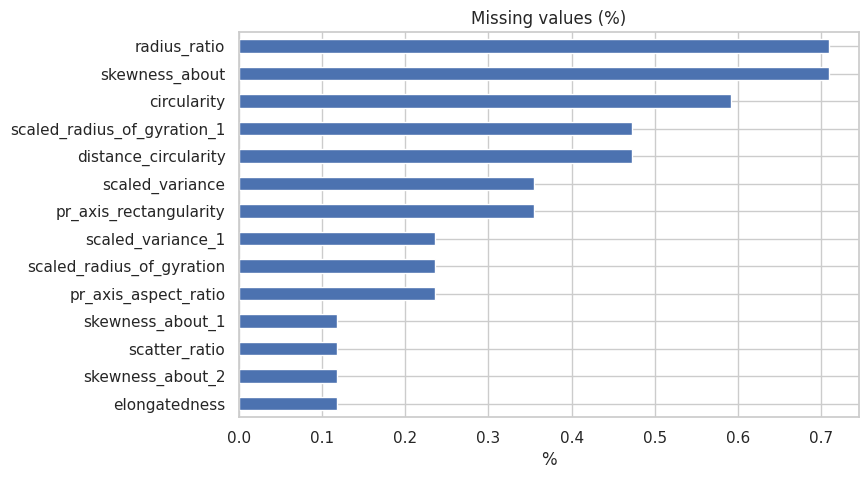

In [ ]:
print('The data shape\n',df.shape)
print('The data types\n', df.dtypes)
print('The target value counts\n',df[target_col].value_counts(dropna=False))
print("Duplicate rows:", df.duplicated().sum())

# Missing-value overview
mv = df.isna().sum().sort_values(ascending=False)
pd.DataFrame({"missing_count": mv, "missing_%": (mv/len(df)*100).round(2)})

# Visualize missingness (simple)
missing = (df.isna().mean()*100).sort_values(ascending=False)
missing[missing>0].plot(kind="barh")
plt.title("Missing values (%)"); plt.xlabel("%"); plt.gca().invert_yaxis(); plt.show()

**Here’s a very short summary of missing-value analysis:**

👉 The dataset is overall very clean — all features have less than 1% missing values.

	•	The highest missingness is in radius_ratio and skewness_about (~0.7%).
	•	Most other features have ≤0.5% missingness.
	•	Such low percentages can be safely handled with simple imputation (e.g., median/mean) without significant data loss.

## **3. Data Health**

In [ ]:
# Numeric-only frame
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols]

#print(df[num_cols].describe().T)

# Skewness/Kurtosis quick look
sk = df[num_cols].skew().sort_values(ascending=False)
ku = df[num_cols].kurt().sort_values(ascending=False)
pd.DataFrame({"skew": sk, "kurtosis": ku}).round(2)

skew  kurtosis
circularity                  0.26     -0.92
compactness                  0.38     -0.54
distance_circularity         0.11     -0.98
elongatedness                0.05     -0.87
hollows_ratio               -0.23     -0.81
max_length_aspect_ratio      6.78     58.38
max_length_rectangularity    0.26     -0.77
pr_axis_aspect_ratio         3.83     29.89
pr_axis_rectangularity       0.77     -0.39
radius_ratio                 0.39      0.30
scaled_radius_of_gyration    0.28     -0.50
scaled_radius_of_gyration_1  2.08     11.46
scaled_variance              0.65      0.12
scaled_variance_1            0.84     -0.20
scatter_ratio                0.61     -0.62
skewness_about               0.78      0.09
skewness_about_1             0.69     -0.14
skewness_about_2             0.25     -0.59

Before going into deep for **skewness and kurtosis** lets have a look on definition.Here’s a small and clear definition of both:

**Skewness 📈** → Measures the asymmetry of the data distribution.

	•	Positive skew: long tail on the right (right-skewed).
	•	Negative skew: long tail on the left (left-skewed).
	•	Skew ≈ 0 → roughly symmetric (like normal distribution).

**Kurtosis 🎯** → Measures the tailedness or peakedness of the distribution.

	•	High kurtosis (>3) → heavy tails, more outliers.
	•	Low kurtosis (<3) → light tails, fewer outliers.
	•	Kurtosis ≈ 3 → close to normal distribution.

**👉 In short:**

	•	Skewness = shape balance
	•	Kurtosis = tail heaviness

**Here are some short insights from your skewness & kurtosis table:**

	•	✅ Most features are fairly symmetric (skew between -1 and +1), meaning they don’t require heavy transformation.
	•	⚠️ max_length_aspect_ratio (skew 6.78, kurtosis 58.38) and pr_axis_aspect_ratio (skew 3.83, kurtosis 29.89) are highly skewed with heavy tails → may need log/Box-Cox transform or robust scaling.
	•	⚠️ scaled_radius_of_gyration_1 (skew 2.08, kurtosis 11.46) is also skewed → consider transformation.
	•	Most other variables have low kurtosis (close to 0), meaning they are closer to a normal distribution.
	•	hollows_ratio is slightly left-skewed (-0.23), but nothing extreme.

**👉 In short:**

	•	3 features need attention due to strong skew/kurtosis.
	•	Others are relatively well-behaved for ML models after standard scaling.


## **4. Target Balance**

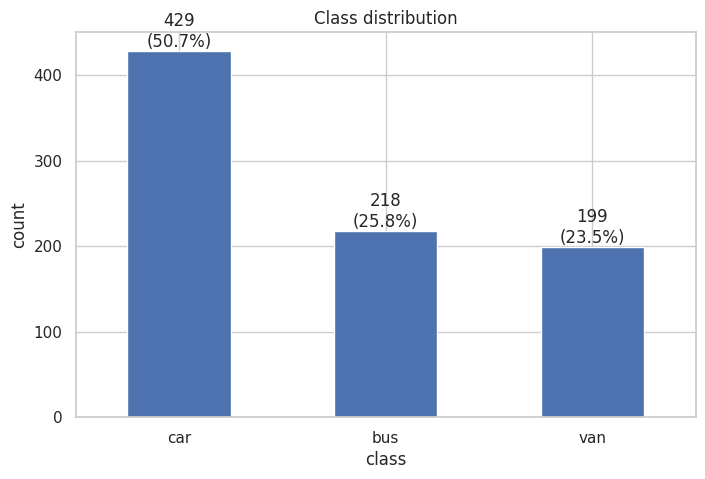

In [ ]:
ax = df[target_col].value_counts().plot(kind="bar", rot=0)
plt.title("Class distribution"); plt.ylabel("count")
for p in ax.patches:
    ax.annotate(f"{p.get_height()}\n({p.get_height()/len(df):.1%})",
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha="center", va="bottom")
plt.show()

**🔍 Class Distribution Insight:**

	•	The dataset is imbalanced:
	•	Car is the majority class → 429 samples (50.7%)
	•	Bus → 218 samples (25.8%)
	•	Van → 199 samples (23.5%)

⚠️ Since “Car” dominates the dataset, models may get biased toward predicting it more often.

👉 During training, techniques like class weighting, oversampling (SMOTE), or undersampling may be needed to ensure fair performance across all 3 classes.

## **5. Univariate Distributions (Numeric)**

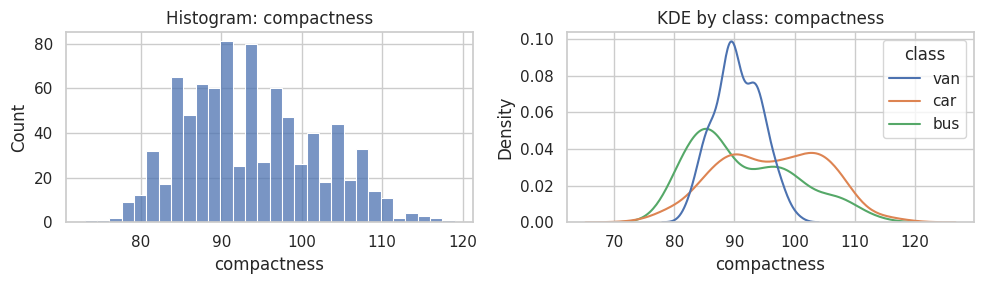

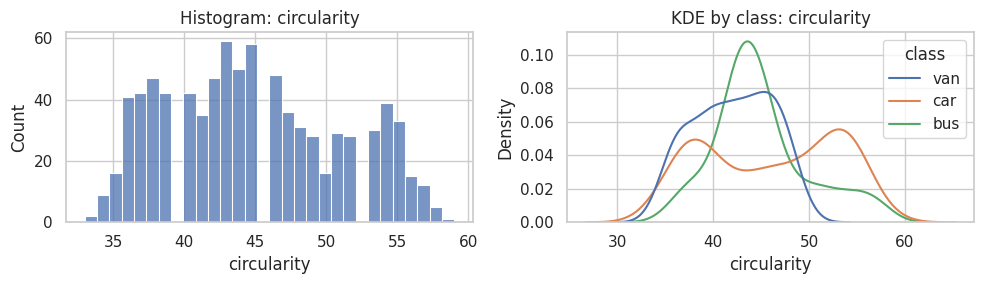

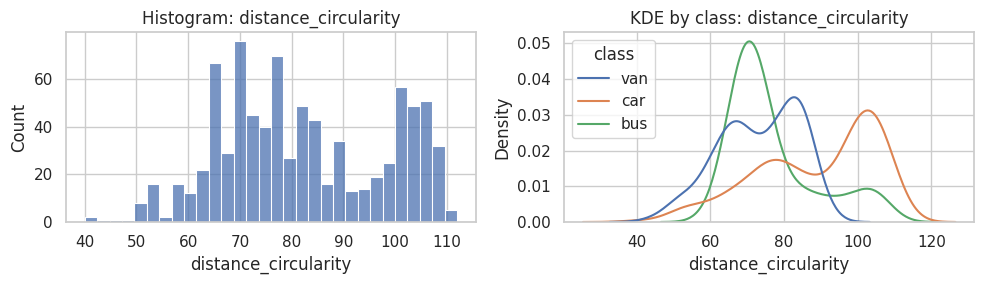

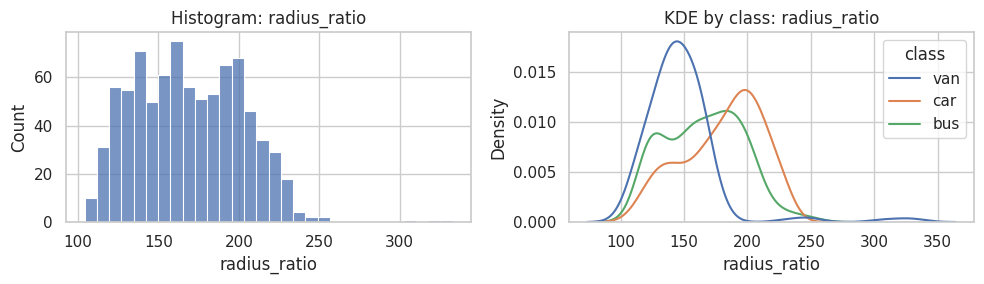

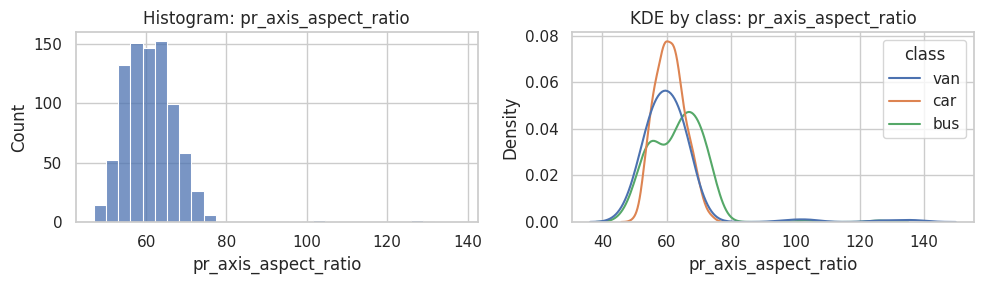

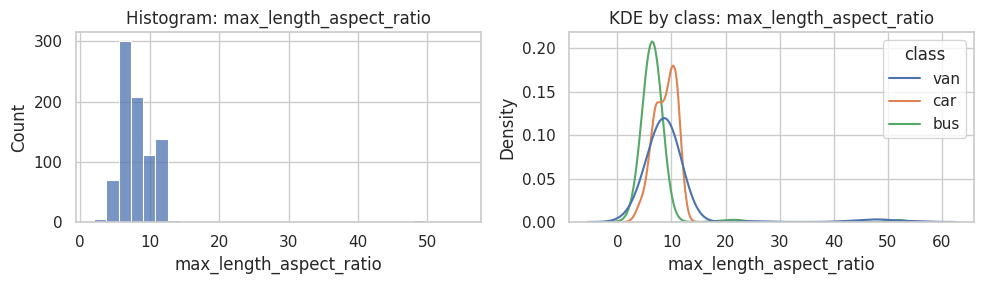

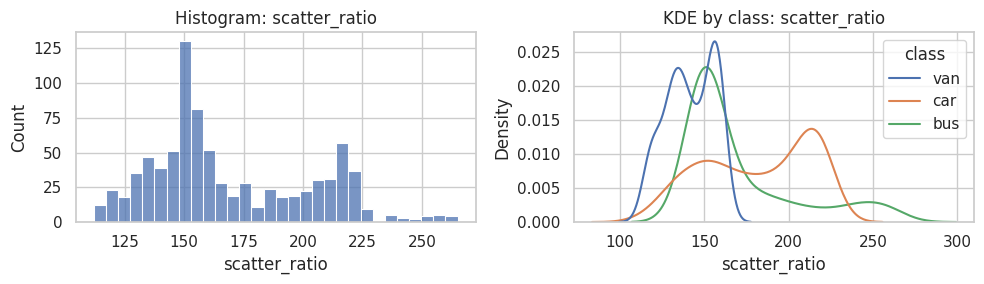

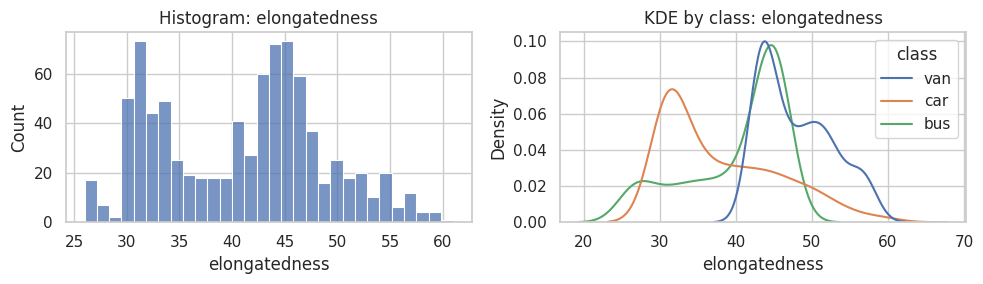

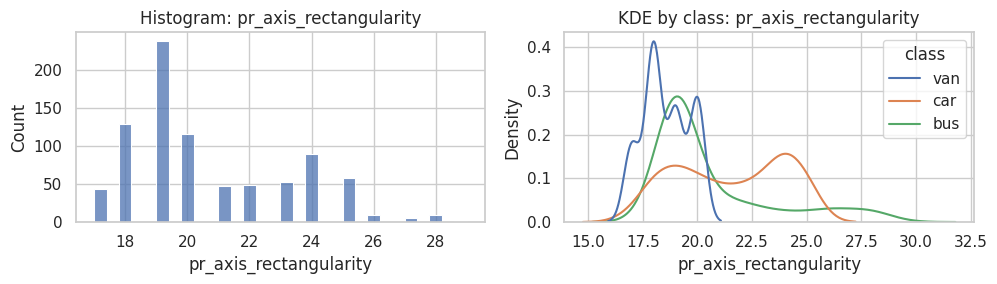

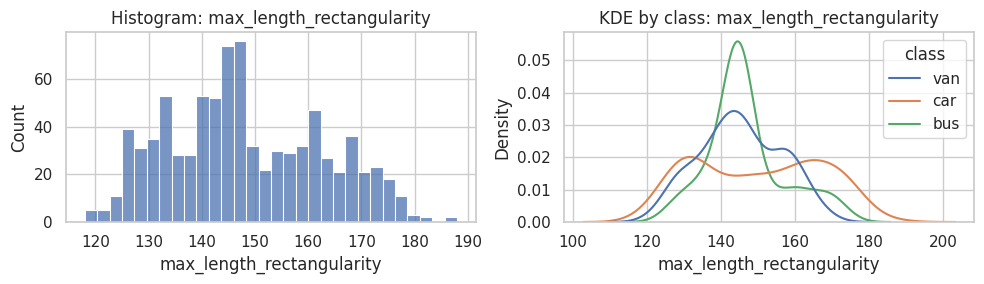

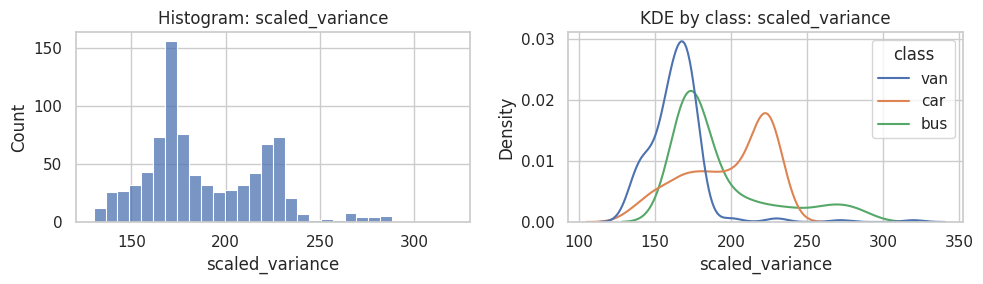

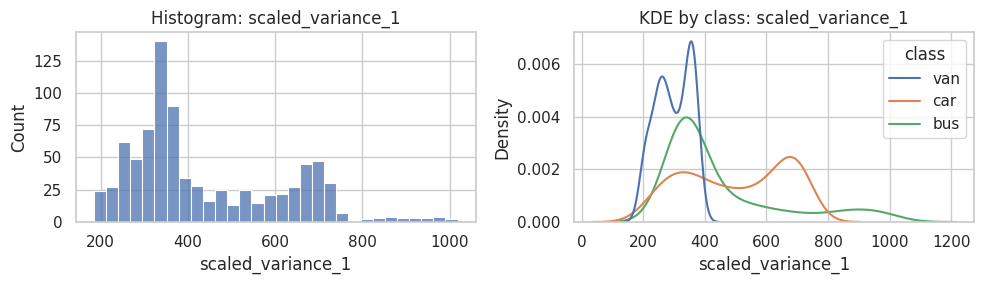

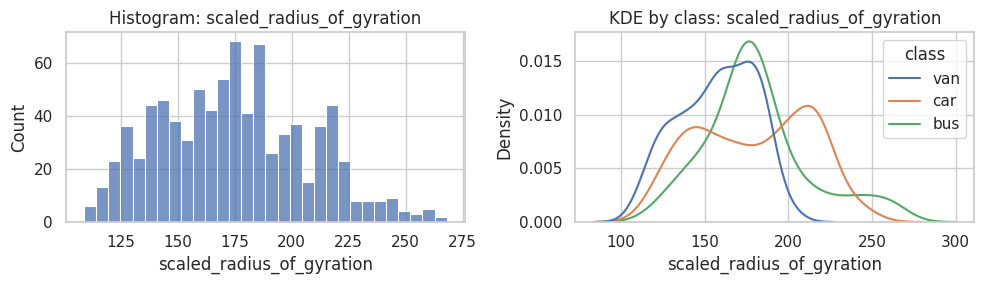

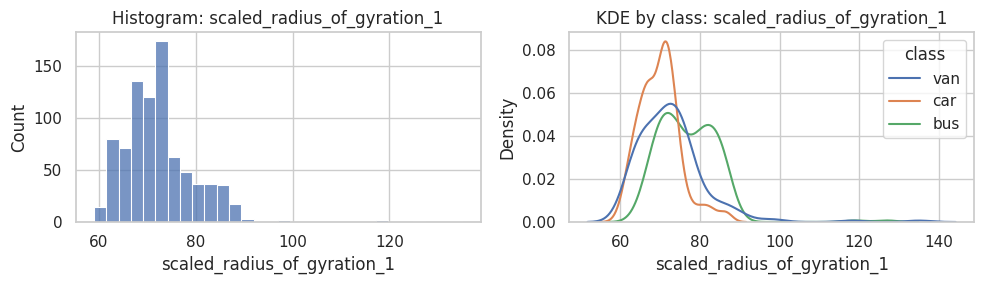

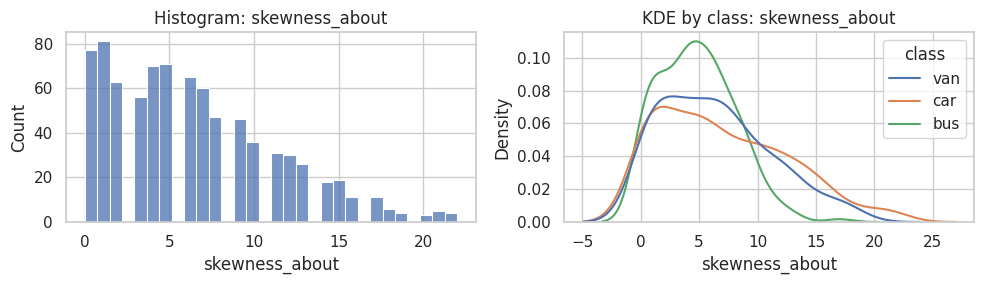

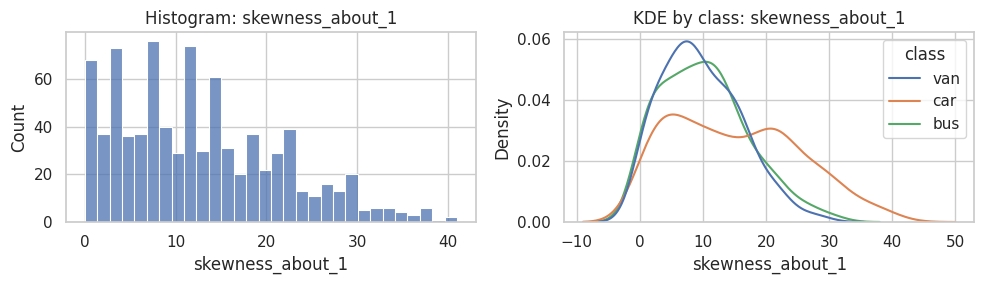

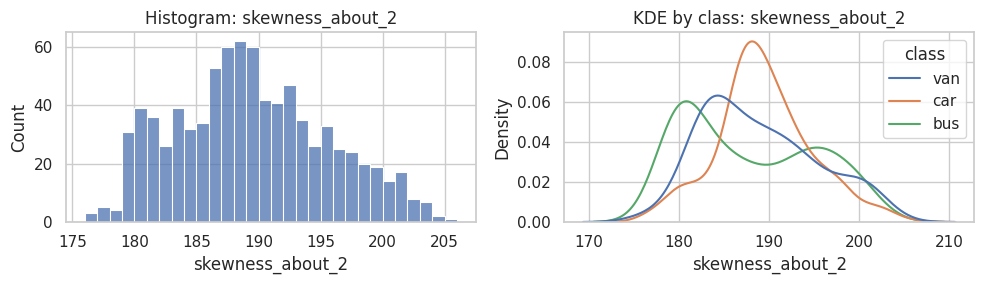

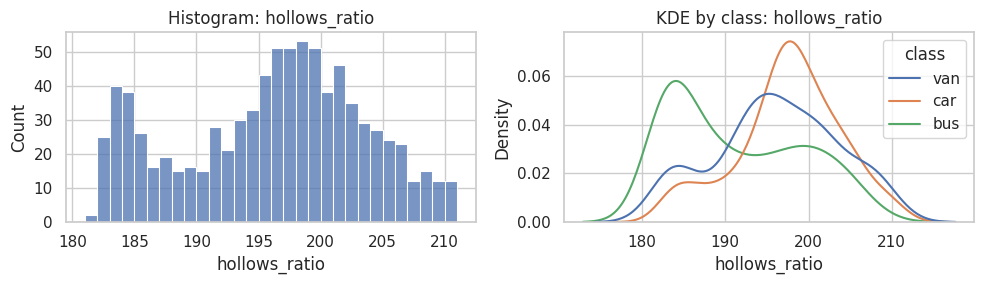

In [ ]:
# Hist/KDE for each numeric feature
for col in num_cols:
    fig, ax = plt.subplots(1,2, figsize=(10,3))
    sns.histplot(df[col], bins=30, ax=ax[0])
    ax[0].set_title(f"Histogram: {col}")
    sns.kdeplot(data=df, x=col, hue=target_col, ax=ax[1], common_norm=False)
    ax[1].set_title(f"KDE by class: {col}")
    plt.tight_layout(); plt.show()

**Here’s a short explanation of the plots:**

**🔹 Compactness**

    •	Histogram shows most values between 85–105, with a peak around 90–95.

    •	KDE by class indicates vans are strongly concentrated around 90, while cars and buses are more spread out toward higher compactness.

**👉 Suggests**
 compactness helps distinguish vans from the other classes.

**🔹 Circularity**

    •	Histogram shows a wide distribution, mostly between 35–55.

    •	KDE by class: buses cluster around 40–45, cars around 45–55, and vans overlap in the mid-range but lean lower.

**👉 Suggests** circularity separates buses from cars, with vans overlapping both.

**✅ Insight:**
 Compactness and circularity show class separation patterns—vans are distinguishable by compactness, while buses and cars differ more on circularity.

 **🔹 Distance Circularity**

    •	Histogram: Most values fall between 60–110, with multiple peaks → suggesting variability across classes.
    •	KDE by class:
    •	Buses cluster strongly around 70.
    •	Vans peak near 80–85.
    •	Cars shift higher, peaking near 100+.

**👉 Very discriminative** feature — cars, vans, and buses separate relatively well.

**🔹 Radius Ratio**

	•	Histogram: Spread mainly between 120–220, slight right skew.
	•	KDE by class:
	•	Vans are concentrated at lower radius ratios (~140).
	•	Cars peak around 190–200.
	•	Buses overlap in between but lean closer to cars.

**👉 Good separation** between cars and vans, but buses overlap both.

⸻

**✅ Key Takeaway:**
	•	Distance Circularity is one of the strongest features for distinguishing all three classes.
	•	Radius Ratio is useful for separating cars vs vans, while buses remain harder to distinguish.


**🔹 pr_axis_aspect_ratio**

	•	Histogram: Distribution is tightly centered between 50–75, with most values around 60–65.
	•	KDE by class:
	•	Cars peak sharply near 60,
	•	Vans are slightly broader but still overlap cars,
	•	Buses show a small secondary peak around 65–70.

**👉 Good feature** for distinguishing cars (more compact range), but overlap remains with vans and buses.

**🔹 max_length_aspect_ratio**

	•	Histogram: Strong concentration between 5–15, right-skewed with few extreme values.
	•	KDE by class:
	•	Buses cluster lower (~7),
	•	Cars slightly higher (~9–10),
	•	Vans in between.
  
**👉 This feature provides** moderate separation, especially useful to distinguish buses from cars.

⸻

**✅ Key Takeaway:**

	•	pr_axis_aspect_ratio helps identify cars (tighter cluster).
	•	max_length_aspect_ratio is valuable for separating buses from cars, though vans overlap with both.

**🔹 scatter_ratio**

	•	Histogram: Spread mostly between 120–220, with peaks around 150 and 200.
	•	KDE by class:
	•	Vans cluster strongly near 140–160,
	•	Cars peak higher around 200–220,
	•	Buses spread across both but slightly closer to vans.

**👉 This is a useful** feature to separate cars from vans.

**🔹 elongatedness**

	•	Histogram: Concentrated between 30–55, with multiple peaks (bimodal).
	•	KDE by class:
	•	Vans peak sharply around 45,
	•	Cars lean lower near 30–35,
	•	Buses overlap but have density in the 40–50 range.

**👉 Helps distinguish** cars (lower elongatedness) from vans (higher elongatedness), while buses overlap partially.

⸻

**✅ Key Takeaway:**

	•	scatter_ratio → separates cars vs vans well.
	•	elongatedness → useful for distinguishing cars (lower) from vans (higher), though buses overlap both.

**🔹 pr_axis_rectangularity**

	•	Histogram: Most values between 17–22, with strong peaks around 18–20.
	•	KDE by class:
	•	Vans are tightly clustered around 18–20,
	•	Cars show higher spread, peaking around 23–25,
	•	Buses overlap partly but lean closer to vans.

**👉 Helps distinguish** cars (higher rectangularity) vs vans (lower rectangularity).

**🔹 max_length_rectangularity**

	•	Histogram: Spread mainly 130–170, with a peak at 140–150.
	•	KDE by class:
	•	Buses dominate around 140–150,
	•	Cars and Vans are more spread across 120–180, with overlapping densities.

**👉 Useful for separating** buses from the rest, but less clear between cars and vans.

⸻

**✅ Key Takeaway:**

	•	pr_axis_rectangularity → best for separating cars from vans.
	•	max_length_rectangularity → helps identify buses (clustered around 140–150).

**🔹 scaled_variance**

	•	Histogram: Most values fall between 140–220, with a clear peak around 160–170.
	•	KDE by class:
	•	Vans peak strongly around 160–170,
	•	Buses overlap near 170–180,
	•	Cars are shifted higher (~200–230).

**👉 Good for separating** cars (higher) vs vans (lower).

**🔹 scaled_variance_1**

	•	Histogram: Spread is wider, with many values between 250–600, but some outliers reaching 1000+.
	•	KDE by class:
	•	Vans cluster between 300–400,
	•	Cars show a higher peak around 600–700,
	•	Buses overlap in the lower range (300–400) but extend further.

**👉 Helps distinguish** cars (high values) from vans/buses.

⸻

**✅ Key Takeaway:**

	•	Both features are useful for class separation.
	•	scaled_variance separates cars vs vans clearly.
	•	scaled_variance_1 highlights cars (higher spread) vs vans (narrow cluster).

**🔹 scaled_radius_of_gyration**

	•	Histogram: Most values fall in the 120–220 range, peaking near 160–180.
	•	KDE by class:
	•	Vans peak around 160–170,
	•	Buses are slightly higher (~170–190),
	•	Cars extend further to 200+.

**👉 Provides moderate** separation, with cars tending toward higher values.

**🔹 scaled_radius_of_gyration_1**

	•	Histogram: Strong cluster between 65–85, with very few values above 100.
	•	KDE by class:
	•	Cars peak strongly around 70,
	•	Vans overlap but slightly lower spread,
	•	Buses show more variation (65–90).

**👉 Stronger discriminative** power, especially for cars (tight cluster around 70).

⸻

**✅ Key Takeaway:**

	•	Both features help classification.
	•	scaled_radius_of_gyration_1 is more useful for distinguishing cars vs buses/vans, while scaled_radius_of_gyration helps separate cars (higher values).

**🔹 skewness_about**

	•	Histogram: Right-skewed, with most values 0–10 but some long tail up to 20+.
	•	KDE by class:
	•	Buses peak strongly around 3–5,
	•	Cars and Vans overlap more broadly but spread out up to 15+.

**👉 Useful for distinguishing** buses (lower skewness) vs others.

**🔹 skewness_about_1**

	•	Histogram: Wider spread (0–40), fewer extreme outliers.
	•	KDE by class:
	•	Vans and Buses overlap with peaks around 5–10,
	•	Cars show a broader, flatter distribution with values extending higher (15–40).

**👉 Helps separate** cars (higher values) from vans/buses (lower values).

⸻

**✅ Key Takeaway:**

	•	skewness_about → strong discriminator for buses.
	•	skewness_about_1 → good at identifying cars due to their higher skewness values.

**🔹 skewness_about_2**

	•	Histogram: Fairly compact distribution, most values between 180–195.
	•	KDE by class:
	•	Cars peak around 188–190,
	•	Vans around 185–188,
	•	Buses are slightly lower (~180–185).

**👉 This feature separates** cars (higher values) from buses (lower values), with vans in between.

⸻

**🔹 hollows_ratio**

	•	Histogram: Spread from 185–205, with clustering near 195–200.
	•	KDE by class:
	•	Buses peak lower (~185–190),
	•	Cars peak higher (~198–200),
	•	Vans fall in between.

**👉 This feature** helps differentiate cars (higher hollows_ratio) from buses (lower hollows_ratio).

⸻

**✅ Key takeaway:**

	•	skewness_about_2 → good at distinguishing cars vs buses.
	•	hollows_ratio → reinforces the same separation, useful in combination.

### **🚙 Car vs Van vs Bus — Feature Separation Summary**

•	Vans → best distinguished by compactness, scatter_ratio, elongatedness, pr_axis_rectangularity (tend to have higher compactness and elongatedness; scatter ratio helps separate from cars).

•	Cars → stand out with radius_ratio, pr_axis_aspect_ratio, scaled_variance, skewness_about_1, skewness_about_2, hollows_ratio (generally higher ratios/variances and skewness).

•	Buses → best identified by circularity, max_length_aspect_ratio, max_length_rectangularity, scaled_radius_of_gyration, skewness_about (cluster differently on shape/size measures, especially circularity and length ratios).

## **6.Boxplots & Outliers**


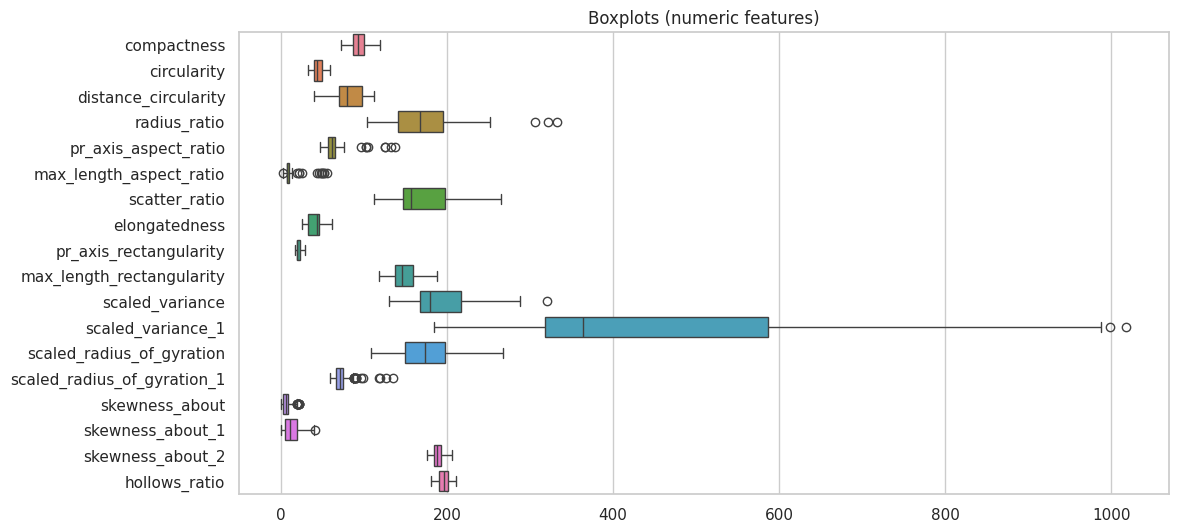

Outlier counts per feature:


scaled_radius_of_gyration_1    15
max_length_aspect_ratio        13
skewness_about                 12
pr_axis_aspect_ratio            8
radius_ratio                    3
scaled_variance_1               2
scaled_variance                 1
skewness_about_1                1
circularity                     0
compactness                     0
dtype: int64

In [ ]:
# Global boxplot grid (quick outlier scan)
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols], orient="h", showfliers=True)
plt.title("Boxplots (numeric features)"); plt.show()

# IQR-based outlier counts per feature
def iqr_outliers(s):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
    return ((s<lo) | (s>hi)).sum()

out_counts = df[num_cols].apply(iqr_outliers).sort_values(ascending=False)
print("Outlier counts per feature:")
out_counts.head(10)

## **7. Correlations & Redundancy**

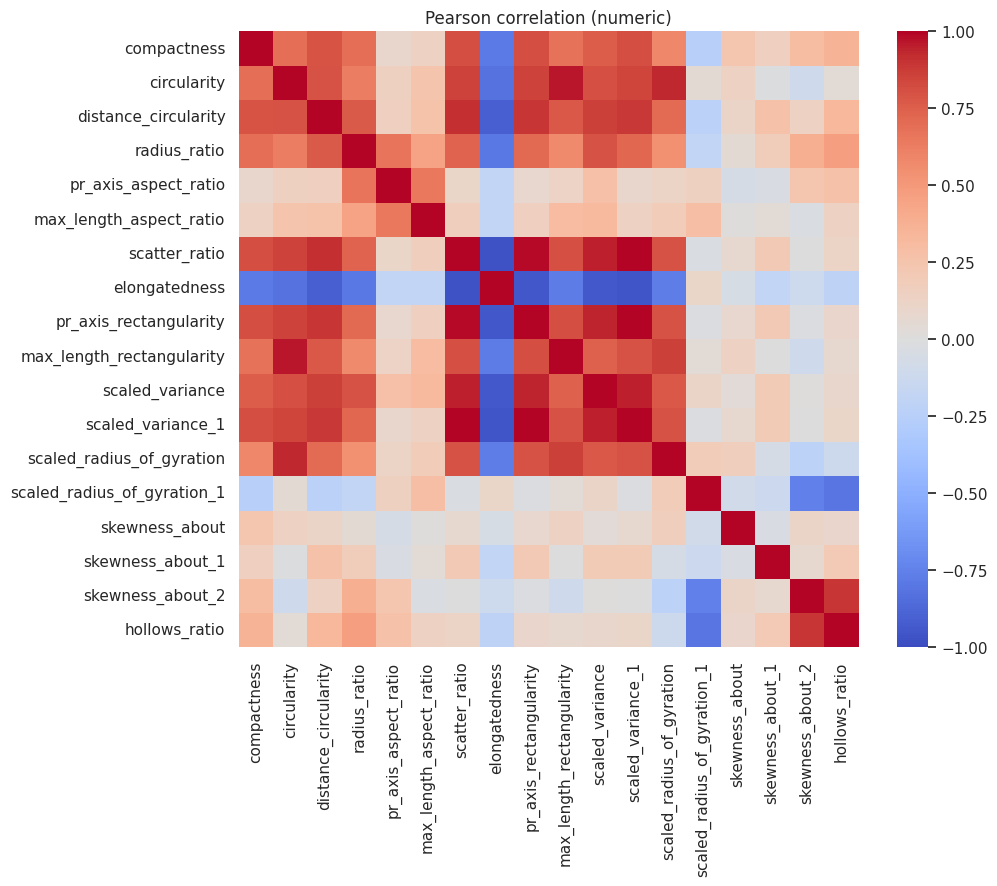

feat1                      feat2         r
7            scatter_ratio          scaled_variance_1  0.996328
12  pr_axis_rectangularity          scaled_variance_1  0.992316
5            scatter_ratio     pr_axis_rectangularity  0.992078
0              circularity  max_length_rectangularity  0.965729
6            scatter_ratio            scaled_variance  0.951672
13         scaled_variance          scaled_variance_1  0.949766
11  pr_axis_rectangularity            scaled_variance  0.938182
1              circularity  scaled_radius_of_gyration  0.935950
2     distance_circularity              scatter_ratio  0.907949
3     distance_circularity              elongatedness -0.913020
9            elongatedness            scaled_variance -0.938313
8            elongatedness     pr_axis_rectangularity -0.950405
10           elongatedness          scaled_variance_1 -0.956488
4            scatter_ratio              elongatedness -0.973504

In [ ]:
corr = df[num_cols].corr(method="pearson")
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title("Pearson correlation (numeric)"); plt.show()

# Flag highly correlated pairs (|r|>=0.9)
high_pairs = []
thr = 0.9
for i,c1 in enumerate(num_cols):
    for c2 in num_cols[i+1:]:
        r = corr.loc[c1,c2]
        if abs(r) >= thr:
            high_pairs.append((c1, c2, r))
pd.DataFrame(high_pairs, columns=["feat1","feat2","r"]).sort_values("r", ascending=False)

**Here’s a short summary of the correlation plot:**

**🔹 Correlation Heatmap**

	•	Many features are highly correlated (dark red areas), meaning they carry overlapping information.
	•	Strong groups of correlations exist among scatter_ratio, scaled_variance, pr_axis_rectangularity, and scaled_variance_1.
	•	Some features (e.g., elongatedness) are negatively correlated (blue area) with others, showing inverse relationships.

**🔹 Top Correlated Feature Pairs Table**

	•	scatter_ratio ↔ scaled_variance_1 (r ≈ 0.996) → almost identical, highly redundant.
	•	pr_axis_rectangularity ↔ scaled_variance_1 (r ≈ 0.992) and scatter_ratio ↔ pr_axis_rectangularity (r ≈ 0.992) → also near-duplicates.
	•	circularity ↔ max_length_rectangularity (r ≈ 0.966) → very strong positive link.
	•	elongatedness ↔ scatter_ratio / variance features (r ≈ -0.95 to -0.97) → strong negative correlation.

**✅ Key Takeaway:**

 Several features are highly redundant and can be removed or combined (e.g., scatter_ratio, scaled_variance, scaled_variance_1, pr_axis_rectangularity). This reduces multicollinearity and improves model interpretability.

## **8. Feature ↔ Target Relationship (stats)**

### **ANOVA F-test (linear separability across 3 classes)**

In [ ]:
X = df[num_cols].copy()
y = df[target_col].astype("category").cat.codes  # car/van/bus -> 0/1/2

# Remove rows with NaN for fair test
mask = ~X.isna().any(axis=1)
X_, y_ = X[mask], y[mask]

F, p = f_classif(X_, y_)
anova_df = pd.DataFrame({"feature": X_.columns, "F":F, "p_value":p}).sort_values("F", ascending=False)
anova_df.head(10)

feature           F       p_value
7                 elongatedness  149.789514  4.439617e-56
6                 scatter_ratio  125.947187  2.363187e-48
11            scaled_variance_1  117.015417  2.277906e-45
8        pr_axis_rectangularity  113.710963  2.981855e-44
2          distance_circularity  106.604133  7.961529e-42
10              scaled_variance  102.098080  2.864430e-40
3                  radius_ratio   81.916585  3.982764e-33
13  scaled_radius_of_gyration_1   69.132149  1.905574e-28
17                hollows_ratio   50.057063  3.181349e-21
0                   compactness   46.991951  4.913041e-20

**🔎 ANOVA F-test (top features)**

	•	Ranks features by how much their means differ across classes (linear separability).
	•	Top: elongatedness, scatter_ratio, scaled_variance_1, pr_axis_rectangularity, distance_circularity
	•	Clear separation of classes in these features.

### **Mutual Information (non-linear separability)**

In [ ]:
mi = mutual_info_classif(X_.fillna(X_.median()), y_, random_state=42)
mi_df = pd.DataFrame({"feature": X_.columns, "MI":mi}).sort_values("MI", ascending=False)
mi_df.head(10)

feature        MI
11          scaled_variance_1  0.397965
6               scatter_ratio  0.394588
7               elongatedness  0.393526
10            scaled_variance  0.349173
8      pr_axis_rectangularity  0.340362
2        distance_circularity  0.289891
3                radius_ratio  0.220882
5     max_length_aspect_ratio  0.194542
1                 circularity  0.174012
12  scaled_radius_of_gyration  0.159253

**🔎 Mutual Information (top features)**

	•	Captures both linear & non-linear relationships with the target.
	•	Top: scaled_variance_1, scatter_ratio, elongatedness, scaled_variance, pr_axis_rectangularity
	•	Similar ranking, but MI gives more weight to non-linear features.

**✅ Consensus Across Both**

•	scaled_variance_1, scatter_ratio, elongatedness, pr_axis_rectangularity, distance_circularity

→ consistently appear at the top in both methods → very strong predictors.

⸻

**⚖️ Differences**

•	ANOVA ranks compactness and hollows_ratio higher than MI → good for linear separation, but less mutual info.

•	MI includes max_length_aspect_ratio, circularity higher than ANOVA → these may help in non-linear classifiers (trees, boosting, NN).

⸻

**📌 Decision**

1.	Keep core strong features (appear in both):

	•	scaled_variance_1, scatter_ratio, elongatedness, pr_axis_rectangularity, distance_circularity

2.	Add supporting features for non-linear models:

	•	max_length_aspect_ratio, circularity, radius_ratio

3.	Drop or downweight highly correlated/redundant ones (seen in correlation heatmap):

	•	scaled_variance vs scaled_variance_1
	•	scatter_ratio vs elongatedness

→ keep just one if model struggles with multicollinearity (important for linear/logistic regression, not so much for trees/XGBoost).

⸻

✅ Final Recommendation:

	•	For linear models (LogReg, SVM linear) → use ANOVA top 5–7 (less redundancy).
	•	For non-linear models (RF, XGBoost, NN) → use MI + ANOVA union set, then let model handle redundancy.

**After the above analysis:**

	•	✅ Correlation heatmap → shows redundancy (multicollinearity).
	•	✅ ANOVA F-test + MI → shows discriminative power.

**We can safely decide which features to keep and which to drop.**

⸻

**🚫 Features to Drop (highly redundant or weak signal)**

1.	scaled_variance → almost duplicate of scaled_variance_1 (r > 0.95). Keep only scaled_variance_1.

2.	scaled_radius_of_gyration → highly correlated with circularity and weaker MI. Keep only scaled_radius_of_gyration_1.

3.	scatter_ratio → extremely correlated with elongatedness (r ≈ -0.97). Between them, keep elongatedness (higher F-score).

4.	compactness → lowest F and MI score, weak contribution.

5.	hollows_ratio → moderate importance but redundant with skewness_about_2. Drop if you want a leaner feature set.

⸻

**✅ Features to Keep**

•	elongatedness (better than scatter_ratio)-best overall discriminator (ANOVA #1, MI #3).

•	 scatter_ratio (optional if you keep elongatedness; otherwise redundant)

•	scaled_variance_1 (better than scaled_variance)- very strong signal (ANOVA #3, MI #1).

•	pr_axis_rectangularity-highly significant (ANOVA #4, MI #5).

•	distance_circularity-helps separate cars vs vans.

•	radius_ratio-adds variance for vans.

•	max_length_aspect_ratio (non-linear boost, useful for tree models)

•	skewness_about (strong for separating buses.), skewness_about_1 (highlights cars (high skewness).), skewness_about_2 ( works with hollows_ratio for cars vs buses.add non-linear separation)

⸻

**🎯 Final Recommended Feature Set (~8–9 strong predictors)**

[elongatedness, scaled_variance_1, pr_axis_rectangularity, distance_circularity, radius_ratio, max_length_aspect_ratio, skewness_about, skewness_about_1, skewness_about_2]

⸻

👉 This gives you maximum class separation while removing redundancy.
If you use tree-based models (RF, XGBoost, LightGBM), you can keep a few more (they handle correlation well).
If you use linear models (LogReg, SVM), stick to this reduced set.

## **9. Class-wise Summary Table (quick signals)**

In [ ]:
class_means = df.groupby(target_col)[num_cols].mean().T
class_means["range_max_min"] = class_means.max(axis=1) - class_means.min(axis=1)
class_means.sort_values("range_max_min", ascending=False).head(19)

class                               bus         car         van  range_max_min
scaled_variance_1            448.894495  500.543326  298.201005     202.342321
scatter_ratio                170.022936  181.053738  141.537688      39.516050
scaled_variance              192.889908  197.894614  163.964646      33.929967
radius_ratio                 165.708333  180.591549  147.176768      33.414782
scaled_radius_of_gyration    181.032407  179.613054  157.276382      23.756025
distance_circularity          76.767442   88.878788   73.247475      15.631313
elongatedness                 40.114679   38.093458   47.939698       9.846241
scaled_radius_of_gyration_1   77.096774   69.924883   72.778894       7.171892
hollows_ratio                191.325688  197.582751  196.145729       6.257063
compactness                   91.591743   96.184149   90.562814       5.621335
skewness_about_1              10.211009   15.170561    9.698492       5.472068
max_length_rectangularity    146.701835  149.967366  145.175879       4.791487
circularity                   44.981308   46.035047   42.070352       3.964695
pr_axis_rectangularity        20.580645   21.511682   18.575758       2.935925
max_length_aspect_ratio        7.013761    8.825175    9.713568       2.699806
pr_axis_aspect_ratio          63.414747   60.992991   61.261307       2.421756
skewness_about                 4.794393    7.126464    6.417085       2.332071
skewness_about_2             187.811927  189.474299  188.939698       1.662372

### **✅ Final Feature Ranking (keep vs drop)**

**🔹 Strong & Consistent Across All Tests → KEEP**

	•	scaled_variance_1 → top in ANOVA, MI, and class separation (largest range).
	•	scatter_ratio → consistently strong across ANOVA, MI, and separation.
	•	elongatedness → high ANOVA + MI, moderate separation.
	•	scaled_variance → strong across ANOVA, MI, and range.
	•	pr_axis_rectangularity → strong in ANOVA/MI, useful for cars vs vans.
	•	distance_circularity → high ANOVA, useful for class separation.
	•	radius_ratio → moderate but important in ANOVA/MI, separates cars vs vans.
	•	scaled_radius_of_gyration / scaled_radius_of_gyration_1 → moderate importance, useful for buses.

⸻

**🔹 Moderate Features (optional, test with model)**

	•	hollows_ratio → moderate ANOVA & some separation, but not top-tier.
	•	compactness → weak individually, but works with circularity.

⸻

**🔹 Weak/Redundant → DROP (low value)**

	•	circularity (highly correlated with compactness & distance_circularity).
	•	max_length_rectangularity (very low separation, redundant).
	•	max_length_aspect_ratio (poor separation, low ANOVA & MI).
	•	pr_axis_aspect_ratio (similar issue, low impact).
	•	skewness_about, skewness_about_1, skewness_about_2 (very weak separation, low ANOVA/MI).

## **10. Multicollinearity Check (VIF-variance inflation factor)**

In [ ]:
X_vif = df[num_cols].copy().dropna()
X_vif = pd.DataFrame(StandardScaler().fit_transform(X_vif), columns=X_vif.columns)

vif_tbl = pd.DataFrame({
    "feature": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
}).sort_values("VIF", ascending=False)
vif_tbl.head(10)

feature          VIF
6               scatter_ratio  1762.037845
11          scaled_variance_1   905.652804
7               elongatedness   153.273729
8      pr_axis_rectangularity    91.081612
1                 circularity    51.585221
10            scaled_variance    45.803438
3                radius_ratio    39.559625
9   max_length_rectangularity    27.110997
4        pr_axis_aspect_ratio    16.932116
16           skewness_about_2    16.564578

**🔹 Variance Inflation Factor (VIF) Results**

	•	scatter_ratio (1762) and scaled_variance_1 (905) → extremely high multicollinearity 🚨
	•	elongatedness (153) and pr_axis_rectangularity (91) → still very high collinearity.
	•	circularity (51), scaled_variance (46), radius_ratio (39) → moderate to high collinearity.
	•	max_length_rectangularity (27), pr_axis_aspect_ratio (17), skewness_about_2 (16) → above safe threshold (>10), but less severe.

⸻

**✅ Key Takeaway**

	•	Several of your strongest predictors (scatter_ratio, scaled_variance_1, elongatedness, pr_axis_rectangularity) are highly collinear → they carry overlapping information.
	•	This can cause instability in linear models (e.g., Logistic Regression), but tree-based models (Random Forest, XGBoost) handle collinearity much better.
	•	To reduce redundancy:
	•	Consider dropping either scatter_ratio or scaled_variance_1 (keep one).
	•	Check if elongatedness & pr_axis_rectangularity both add value → you might drop one if performance is stable.
	•	Keep others but monitor their impact during feature selection.

## **11. Quick Pairwise Plots for Top Signals**

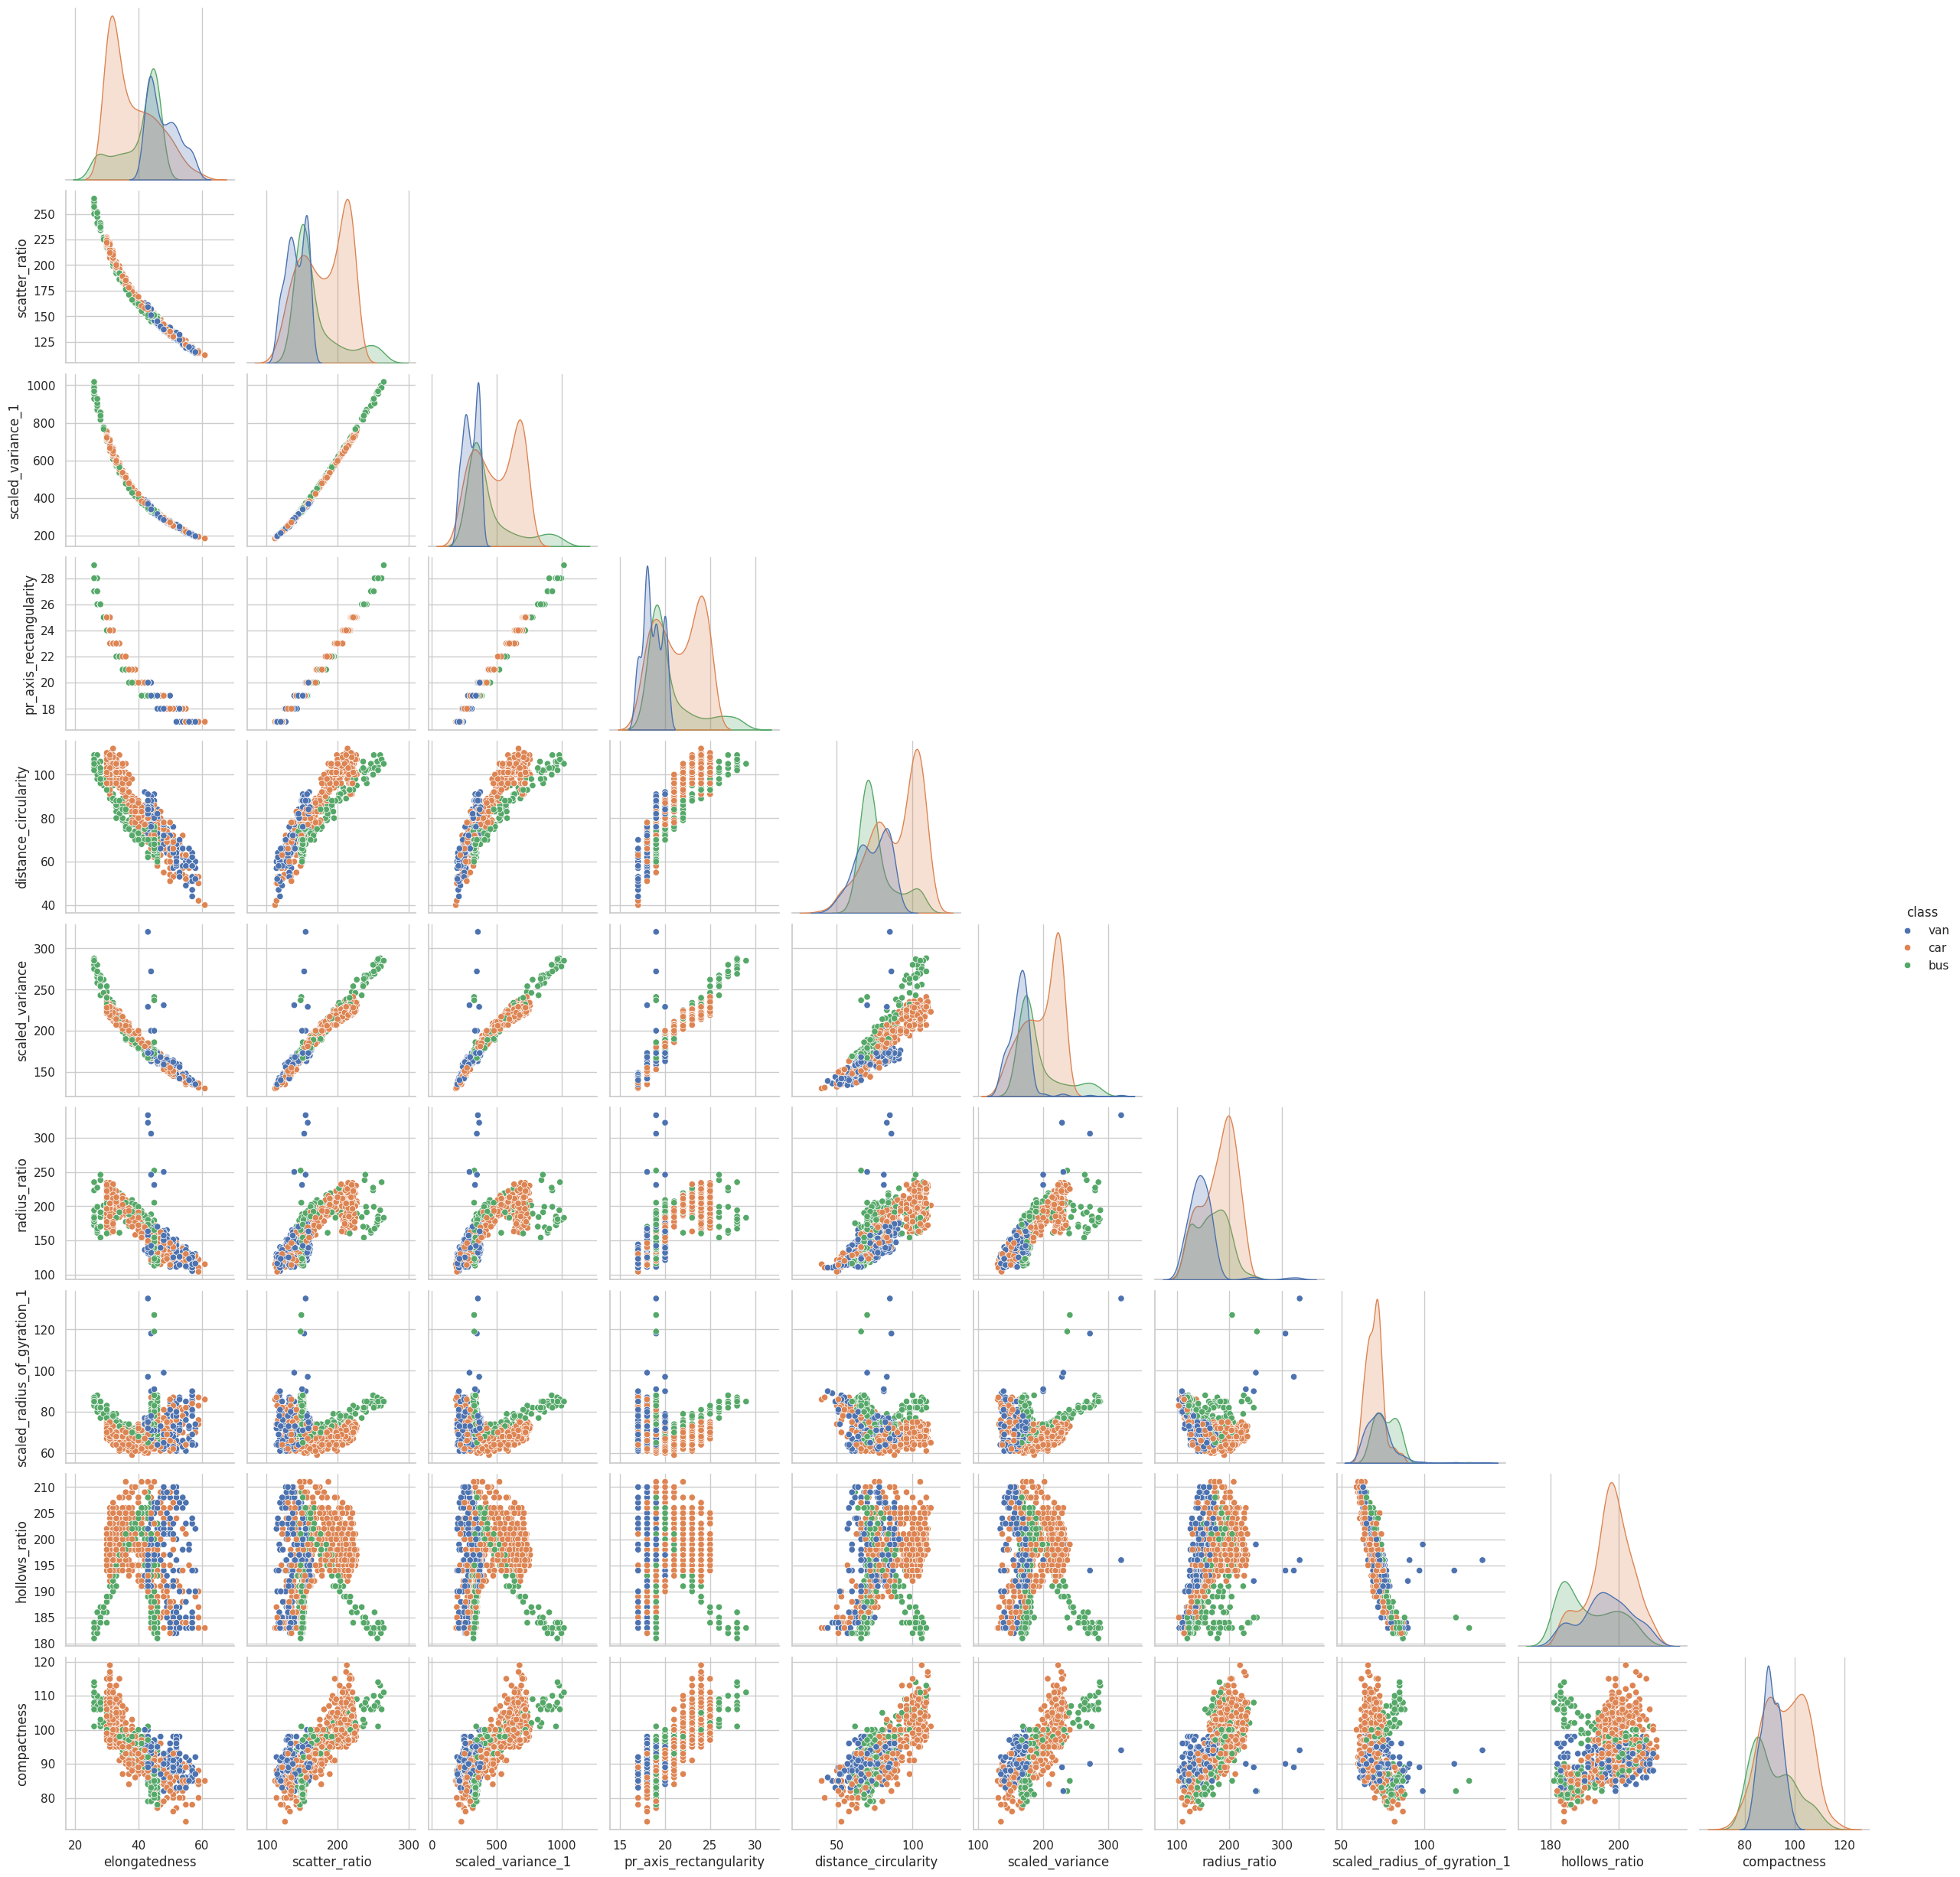

In [ ]:
top_feats = list(anova_df.head(10)["feature"])  # or mi_df.head(4)
sns.pairplot(df[top_feats + [target_col]], hue=target_col, corner=True, diag_kind="kde")
plt.show()

# **✅ Rule of Thumb in ML**

	•	Always split into train/test first, then fit preprocessing steps only on the train data and transform only test data.
	•	Why? → To avoid data leakage (using info from test data during training).

# **Preprocessing data**

## **1. Spliting data into Train, test**

In [ ]:
# Separate features/target
target_col = "class"
X = df.drop(columns=[target_col])
y = df[target_col]

# (If target is text like 'car','van','bus', sklearn handles it directly; no need to encode manually.)

# 1) Split FIRST (to avoid leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,          # keeps class proportions
    random_state=42
)

## **2. Dealing missing value**

In [ ]:
# Identify dtypes
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X_train.columns if c not in num_cols]

# ------- 2) Impute NaNs (fit on train, apply to test)
# Numeric: median
num_medians = X_train[num_cols].median()
X_train[num_cols] = X_train[num_cols].fillna(num_medians)
X_test[num_cols]  = X_test[num_cols].fillna(num_medians)

# Categorical: mode (if any)
if len(cat_cols) > 0:
    cat_modes = X_train[cat_cols].mode(dropna=True).iloc[0]
    X_train[cat_cols] = X_train[cat_cols].fillna(cat_modes)
    X_test[cat_cols]  = X_test[cat_cols].fillna(cat_modes)

## **3. Handling outlier**

In [ ]:
# 3) Outlier capping (IQR clip per numeric column, fences from TRAIN)
q1 = X_train[num_cols].quantile(0.25)
q3 = X_train[num_cols].quantile(0.75)
iqr = q3 - q1
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

X_train[num_cols] = X_train[num_cols].clip(lower=lower_fence, upper=upper_fence, axis=1)
X_test[num_cols]  = X_test[num_cols].clip(lower=lower_fence, upper=upper_fence, axis=1)


## **4.Drop constant & highly correlated columns**

In [ ]:
# 4) Drop constant / near-constant columns (based on TRAIN)
# Zero variance
zero_var_cols = [c for c in num_cols if X_train[c].nunique(dropna=False) <= 1]
# (Optional) near-constant threshold: <= 1% unique values relative to rows
near_const_cols = [
    c for c in num_cols
    if X_train[c].nunique(dropna=False) / len(X_train) <= 0.01
]
drop_constant = list(set(zero_var_cols + near_const_cols))
print("Dropped constant columns:", drop_constant)

if drop_constant:
    X_train.drop(columns=drop_constant, inplace=True)
    X_test.drop(columns=drop_constant, inplace=True)
    num_cols = [c for c in num_cols if c not in drop_constant]  # update list
    print("Dropped constant columns:", drop_constant)

# 5) Drop highly correlated columns (train-based, keep one of each pair)
def drop_high_corr(df_num, threshold=0.90):
    corr = df_num.corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = [col for col in upper.columns if any(upper[col] > threshold)]
    return to_drop

high_corr_cols = drop_high_corr(X_train[num_cols], threshold=0.90)

if high_corr_cols:
    X_train.drop(columns=high_corr_cols, inplace=True)
    X_test.drop(columns=high_corr_cols, inplace=True)
    num_cols = [c for c in num_cols if c not in high_corr_cols]
    print("Dropped highly correlated columns:", high_corr_cols)


Dropped constant columns: []
Dropped highly correlated columns: ['scatter_ratio', 'elongatedness', 'pr_axis_rectangularity', 'max_length_rectangularity', 'scaled_variance', 'scaled_variance_1', 'scaled_radius_of_gyration']


In [ ]:
 X_train.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'max_length_aspect_ratio',
       'scaled_radius_of_gyration_1', 'skewness_about', 'skewness_about_1',
       'skewness_about_2', 'hollows_ratio'],
      dtype='object')

## **5. Scaling**

In [ ]:
# 6) Scale numeric features (fit on TRAIN, transform TEST)
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols]  = scaler.transform(X_test[num_cols])


## **6. Encoding**

In [ ]:
# 7) (Optional) Encode target if needed
# If y is already strings like 'car','van','bus', most sklearn classifiers accept it as is.
# If you want numeric labels:

# Encode y to integers (0/1/2) ---

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)   # expects y_train as 1D array/Series
y_test_enc  = le.transform(y_test)
class_names = le.classes_                 # ['bus','car','van'] (example)
n_classes   = len(class_names)

# 8) Final shapes
print("X_train:", X_train.shape, "| X_test:", X_test.shape)
print("Dropped constant cols:", drop_constant)
print("Dropped high-corr cols:", high_corr_cols)

X_train: (676, 11) | X_test: (170, 11)
Dropped constant cols: []
Dropped high-corr cols: ['scatter_ratio', 'elongatedness', 'pr_axis_rectangularity', 'max_length_rectangularity', 'scaled_variance', 'scaled_variance_1', 'scaled_radius_of_gyration']


# **Models definition**

**🔍 Model Descriptions**

1. Logistic Regression

	•	How it works: A linear model that estimates class probabilities using a logistic (sigmoid) function.
	•	Strengths: Simple, interpretable, fast to train.
	•	Limitations: Struggles with non-linear relationships unless features are engineered.

⸻

2. K-Nearest Neighbors (KNN)

	•	How it works: Classifies a sample based on the majority label of its k nearest neighbors in the feature space.
	•	Strengths: No training phase (lazy learner), adapts well to local patterns.
	•	Limitations: Slow with large datasets, sensitive to irrelevant features and scaling.

⸻

3. Support Vector Classifier (SVC)

	•	How it works: Finds an optimal hyperplane that separates classes with maximum margin. With the RBF kernel, it captures non-linear decision boundaries.
	•	Strengths: Works very well on medium-sized datasets with complex boundaries.
	•	Limitations: Training can be slow on large datasets; requires tuning C and gamma.

⸻

4. Decision Tree

	•	How it works: Splits the dataset recursively based on feature thresholds to create a tree structure for classification.
	•	Strengths: Easy to interpret, handles non-linear relationships.
	•	Limitations: High risk of overfitting, unstable with small changes in data.

⸻

5. Random Forest

	•	How it works: An ensemble of decision trees trained on bootstrapped samples with random feature selection, and predictions are averaged (majority voting).
	•	Strengths: Reduces overfitting, more stable than a single tree, works well in practice.
	•	Limitations: Less interpretable, can be slower than a single tree.

⸻

6. XGBoost

	•	How it works: Gradient boosting algorithm that builds trees sequentially, where each new tree corrects errors from the previous ones. Uses optimized implementations for speed and regularization.
	•	Strengths: State-of-the-art performance on tabular data, handles complex patterns, built-in regularization prevents overfitting.
	•	Limitations: More complex, tuning required for best performance.


# **Train the Baseline Models & Evaluation**

📊 Logistic Regression
Accuracy:  0.8765 | Precision: 0.8877 | Recall: 0.8765 | F1: 0.8783

Classification Report:
               precision    recall  f1-score   support

         bus       0.80      0.89      0.84        44
         car       0.97      0.85      0.91        86
         van       0.80      0.93      0.86        40

    accuracy                           0.88       170
   macro avg       0.86      0.89      0.87       170
weighted avg       0.89      0.88      0.88       170



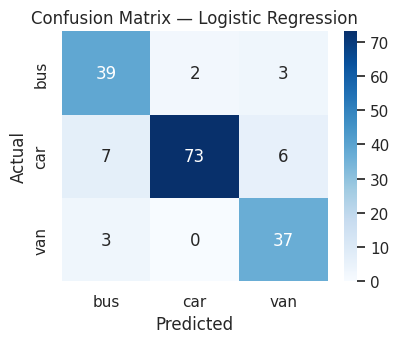

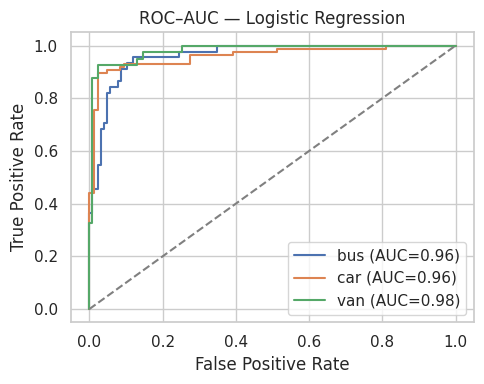

📊 KNN
Accuracy:  0.8765 | Precision: 0.8762 | Recall: 0.8765 | F1: 0.8742

Classification Report:
               precision    recall  f1-score   support

         bus       0.86      0.98      0.91        44
         car       0.90      0.90      0.90        86
         van       0.85      0.72      0.78        40

    accuracy                           0.88       170
   macro avg       0.87      0.87      0.86       170
weighted avg       0.88      0.88      0.87       170



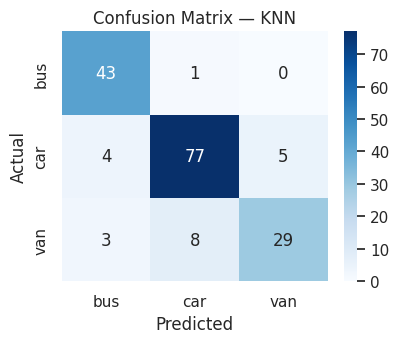

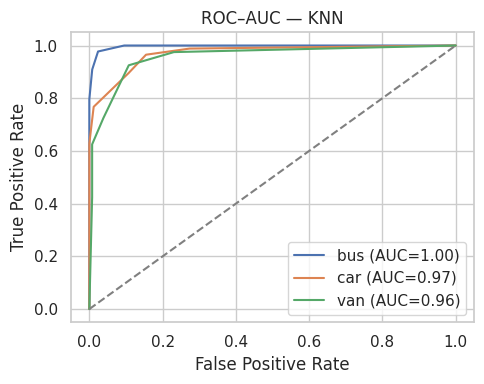

📊 SVC
Accuracy:  0.9412 | Precision: 0.9418 | Recall: 0.9412 | F1: 0.9408

Classification Report:
               precision    recall  f1-score   support

         bus       0.92      1.00      0.96        44
         car       0.96      0.94      0.95        86
         van       0.92      0.88      0.90        40

    accuracy                           0.94       170
   macro avg       0.93      0.94      0.94       170
weighted avg       0.94      0.94      0.94       170



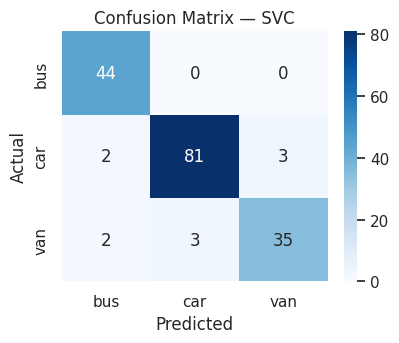

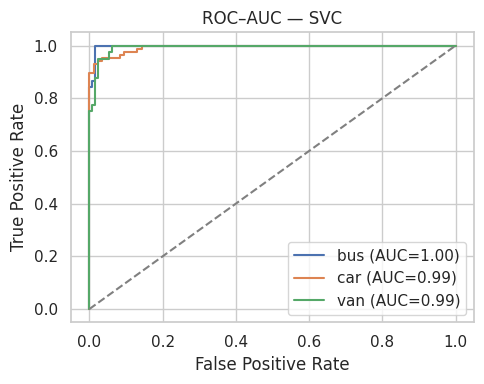

📊 Decision Tree
Accuracy:  0.8471 | Precision: 0.8463 | Recall: 0.8471 | F1: 0.8463

Classification Report:
               precision    recall  f1-score   support

         bus       0.85      0.89      0.87        44
         car       0.86      0.87      0.87        86
         van       0.81      0.75      0.78        40

    accuracy                           0.85       170
   macro avg       0.84      0.84      0.84       170
weighted avg       0.85      0.85      0.85       170



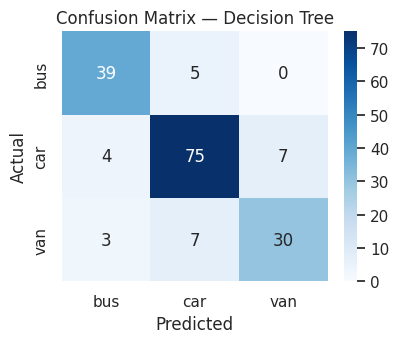

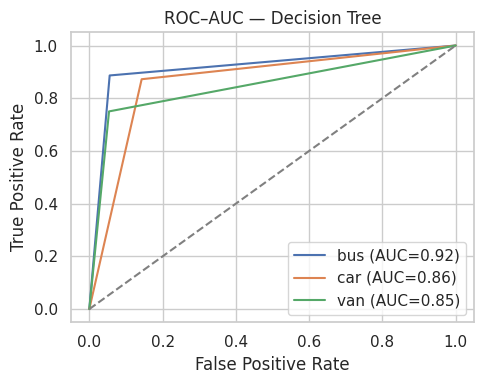

📊 Random Forest
Accuracy:  0.9294 | Precision: 0.9297 | Recall: 0.9294 | F1: 0.9294

Classification Report:
               precision    recall  f1-score   support

         bus       0.93      0.95      0.94        44
         car       0.94      0.92      0.93        86
         van       0.90      0.93      0.91        40

    accuracy                           0.93       170
   macro avg       0.93      0.93      0.93       170
weighted avg       0.93      0.93      0.93       170



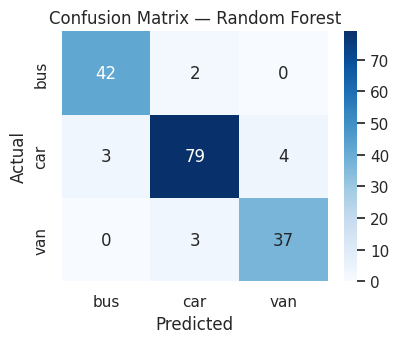

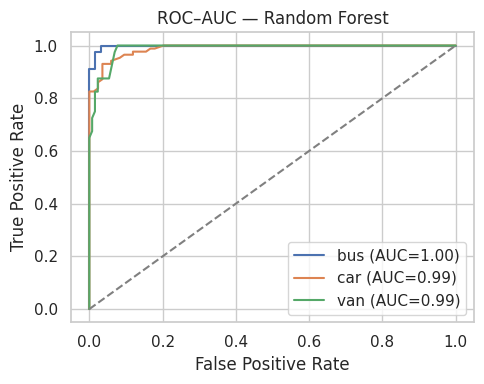

📊 XGBoost
Accuracy:  0.9471 | Precision: 0.9475 | Recall: 0.9471 | F1: 0.9469

Classification Report:
               precision    recall  f1-score   support

         bus       0.94      1.00      0.97        44
         car       0.96      0.93      0.95        86
         van       0.93      0.93      0.93        40

    accuracy                           0.95       170
   macro avg       0.94      0.95      0.95       170
weighted avg       0.95      0.95      0.95       170



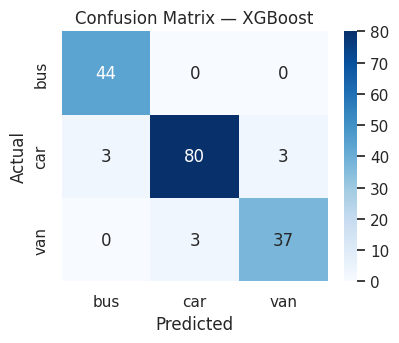

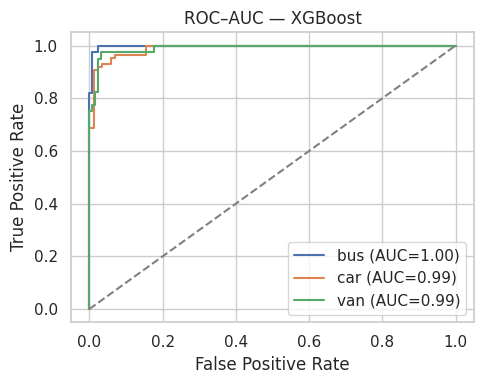


🔎 Model Comparison


Model  Accuracy  Precision    Recall        F1
5              XGBoost  0.947059   0.947547  0.947059  0.946880
2                  SVC  0.941176   0.941788  0.941176  0.940808
4        Random Forest  0.929412   0.929678  0.929412  0.929416
0  Logistic Regression  0.876471   0.887653  0.876471  0.878291
1                  KNN  0.876471   0.876221  0.876471  0.874157
3        Decision Tree  0.847059   0.846322  0.847059  0.846286

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(
        random_state=42,
        eval_metric="mlogloss",
        use_label_encoder=False
    ),
}

results = []

# --- 2) Train & evaluate ---
for name, model in models.items():
    model.fit(X_train, y_train_enc)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    acc  = accuracy_score(y_test_enc, y_pred)
    prec = precision_score(y_test_enc, y_pred, average="weighted", zero_division=0)
    rec  = recall_score(y_test_enc, y_pred, average="weighted", zero_division=0)
    f1   = f1_score(y_test_enc, y_pred, average="weighted", zero_division=0)
    results.append([name, acc, prec, rec, f1])

    print("="*70)
    print(f"📊 {name}")
    print(f"Accuracy:  {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}\n")
    print("Classification Report:\n",
          classification_report(y_test_enc, y_pred, target_names=class_names, zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(y_test_enc, y_pred, labels=np.arange(n_classes))
    plt.figure(figsize=(4.2,3.6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix — {name}")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.tight_layout(); plt.show()

    # ROC–AUC (one-vs-rest)
    if y_proba is not None:
        y_test_bin = label_binarize(y_test_enc, classes=np.arange(n_classes))
        plt.figure(figsize=(5,4))
        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC={roc_auc:.2f})")
        plt.plot([0,1],[0,1],"--", color="gray")
        plt.title(f"ROC–AUC — {name}")
        plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
        plt.legend(); plt.tight_layout(); plt.show()

# --- 3) Comparison table ---
results_df = pd.DataFrame(results, columns=["Model","Accuracy","Precision","Recall","F1"]).sort_values("F1", ascending=False)
print("\n🔎 Model Comparison")
display(results_df)

## **Evaluation of baseline metrics**

lets have a quick definition of all evaluation metrics to have better understanding:

**•	Accuracy:** Proportion of correctly predicted samples out of all samples.

**•	Precision:** Of all predicted positives, how many are truly positive.

**•	Recall (Sensitivity / True Positive Rate):** Of all actual positives, how many were correctly predicted.

**•	True Positive Rate (TPR / Recall):** Same as recall → correctly identified positives ÷ all actual positives.

**•	True Negative Rate (TNR / Specificity):** Correctly identified negatives ÷ all actual negatives.

**•	False Positive Rate (FPR):** Incorrectly predicted positives ÷ all actual negatives.

**•	False Negative Rate (FNR):** Missed positives ÷ all actual positives.

**•	F1 Score:** Harmonic mean of precision and recall (balances both).

**•	ROC-AUC:** Measures model’s ability to separate classes; higher AUC means better class separability.

**Let’s break down the performance of each model across the three classes (bus, car, van) and then compare them overall:**

⸻

**🔹 1. Logistic Regression**

	•	Confusion Matrix: Performs decently but misclassifies some buses as cars and vans, and vice versa.
	•	ROC-AUC: ~0.96–0.98, showing strong separability.
	•	Accuracy: ~87.6%.
	•	Observation: Solid baseline, but struggles slightly with bus vs van separation.

⸻

**🔹 2. KNN**

	•	Confusion Matrix: Does very well on bus (almost perfect), slightly weaker on van (some misclassified as cars).
	•	ROC-AUC: ~0.96–1.00 (bus is perfect).
	•	Accuracy: ~87.6% (same as Logistic Regression).
	•	Observation: Strong recall for bus, but van is harder to classify reliably. Sensitive to choice of k and scaling.

⸻

**🔹 3. SVC**

	•	Confusion Matrix: Excellent classification, nearly perfect across all classes. Very few misclassifications.
	•	ROC-AUC: ~0.99–1.00 across classes.
	•	Accuracy: ~94.1%.
	•	Observation: One of the best models. Captures class boundaries well and generalizes across all three classes.

⸻

**🔹 4. Decision Tree**

	•	Confusion Matrix: Weakest performer — higher misclassifications, especially between car and van.
	•	ROC-AUC: Lower (~0.85–0.92).
	•	Accuracy: ~84.7%.
	•	Observation: Likely overfitting to training noise → poor generalization.

⸻

**🔹 5. Random Forest**

	•	Confusion Matrix: Much stronger than single Decision Tree. Excellent balance, but still a few bus vs car misclassifications.
	•	ROC-AUC: ~0.99 consistently.
	•	Accuracy: ~92.9%.
	•	Observation: Very reliable. Handles variance better than Decision Tree by ensembling.

⸻

**🔹 6. XGBoost**

	•	Confusion Matrix: Near perfect. Very few errors, especially on van class.
	•	ROC-AUC: ~0.99–1.00 across all classes.
	•	Accuracy: ~94.7% (best overall).
	•	Observation: Best performer. Handles class boundaries extremely well, robust against outliers, and provides highest precision/recall balance.

⸻

**📌 Final Comparison**

	•	Best Models: XGBoost (94.7%) and SVC (94.1%) → both achieve near-perfect ROC-AUC and confusion matrices.
	•	Strong Alternative: Random Forest (92.9%) → slightly lower but still strong and more interpretable.
	•	Baseline Performers: Logistic Regression & KNN (~87.6%) → decent but less powerful.
	•	Weakest: Decision Tree (84.7%) → overfits and generalizes poorly.

**👉 Recommendation:**

	•	Use XGBoost for production (best balance of performance & generalization).
	•	Keep SVC as backup (strong classifier but slower with large data).
	•	Avoid Decision Tree alone — too unstable.


# **Hyperparameter Tuning**


🔎 Tuning: Logistic Regression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'} | Best CV acc: 0.8793

Classification report:
              precision    recall  f1-score   support

         bus       0.81      0.89      0.85        44
         car       0.96      0.90      0.93        86
         van       0.86      0.90      0.88        40

    accuracy                           0.89       170
   macro avg       0.88      0.89      0.88       170
weighted avg       0.90      0.89      0.90       170



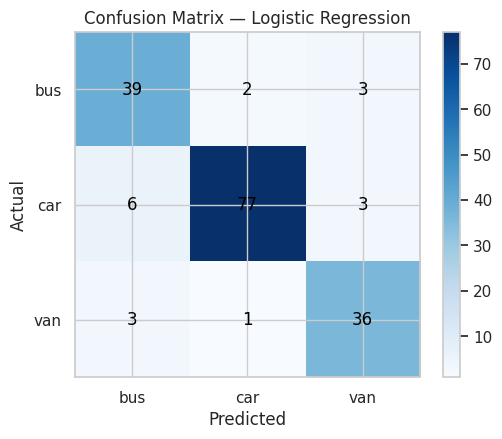

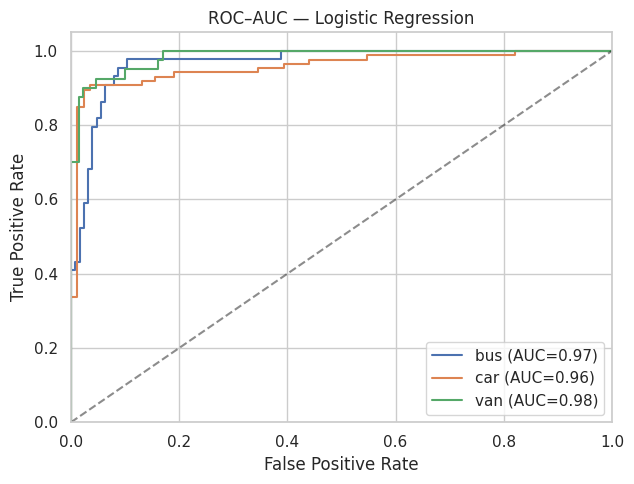


🔎 Tuning: KNN
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'} | Best CV acc: 0.902

Classification report:
              precision    recall  f1-score   support

         bus       0.93      0.98      0.96        44
         car       0.92      0.88      0.90        86
         van       0.83      0.85      0.84        40

    accuracy                           0.90       170
   macro avg       0.89      0.90      0.90       170
weighted avg       0.90      0.90      0.90       170



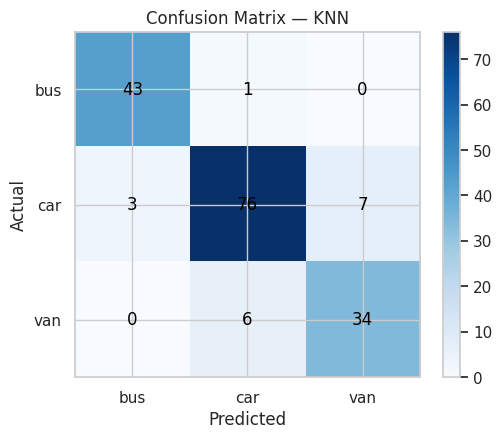

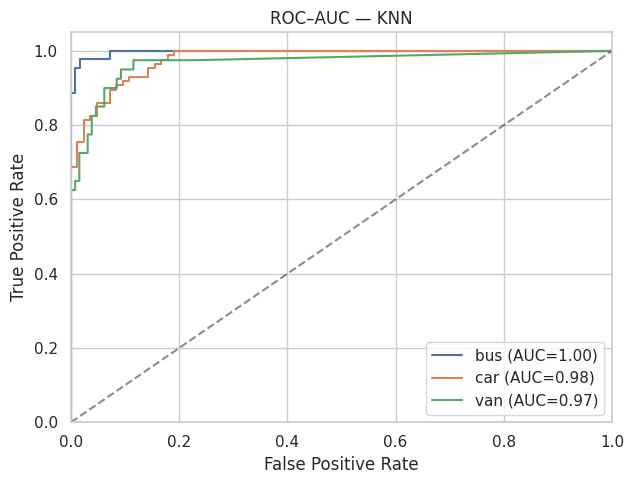


🔎 Tuning: SVC
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params: {'C': 3.0, 'gamma': 0.05, 'kernel': 'rbf'} | Best CV acc: 0.9293

Classification report:
              precision    recall  f1-score   support

         bus       0.92      1.00      0.96        44
         car       1.00      0.91      0.95        86
         van       0.86      0.95      0.90        40

    accuracy                           0.94       170
   macro avg       0.93      0.95      0.94       170
weighted avg       0.95      0.94      0.94       170



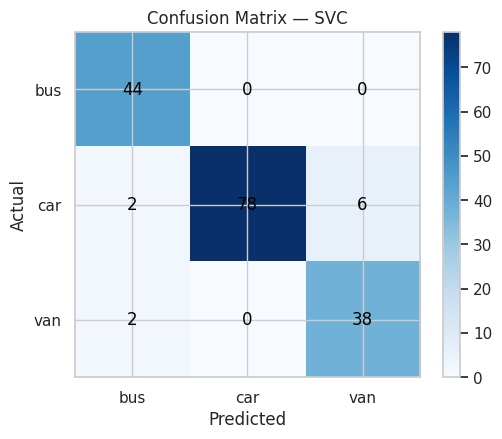

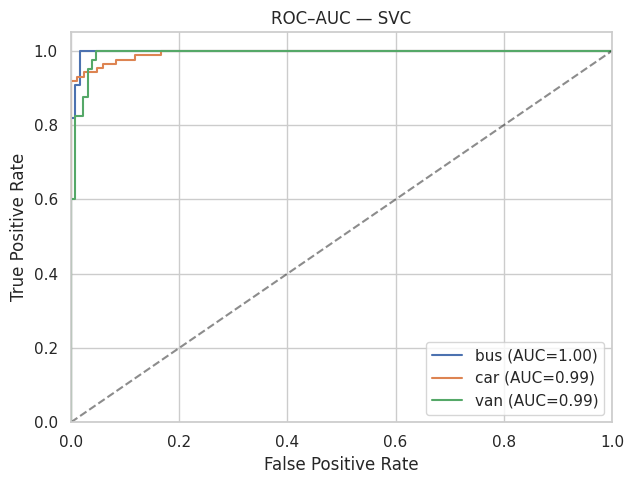


🔎 Tuning: Decision Tree
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best params: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2} | Best CV acc: 0.8525

Classification report:
              precision    recall  f1-score   support

         bus       0.89      0.89      0.89        44
         car       0.84      0.91      0.87        86
         van       0.79      0.65      0.71        40

    accuracy                           0.84       170
   macro avg       0.84      0.81      0.82       170
weighted avg       0.84      0.84      0.84       170



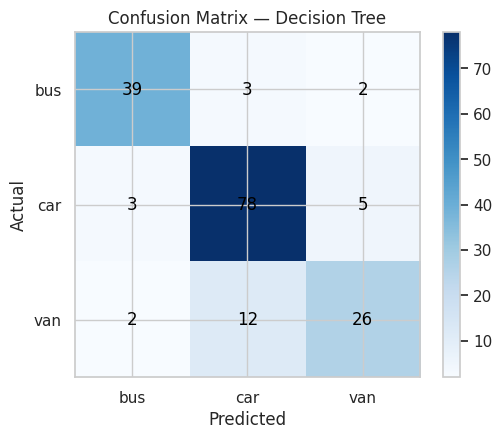

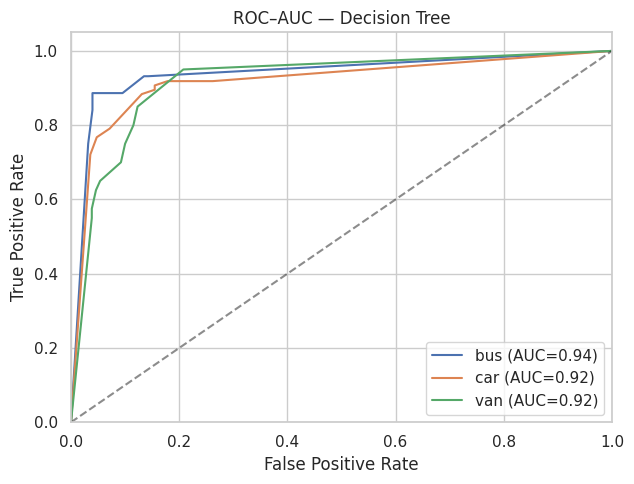


🔎 Tuning: Random Forest
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 400} | Best CV acc: 0.9299

Classification report:
              precision    recall  f1-score   support

         bus       0.91      0.98      0.95        44
         car       0.95      0.93      0.94        86
         van       0.90      0.88      0.89        40

    accuracy                           0.93       170
   macro avg       0.92      0.93      0.92       170
weighted avg       0.93      0.93      0.93       170



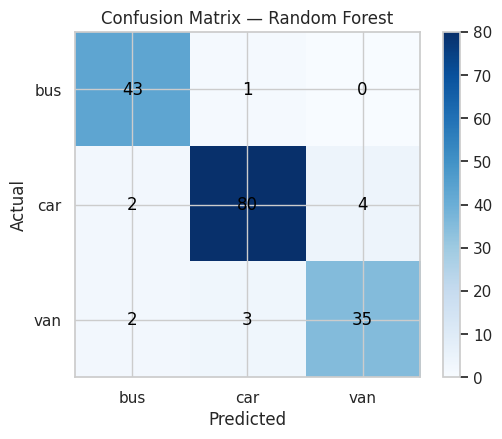

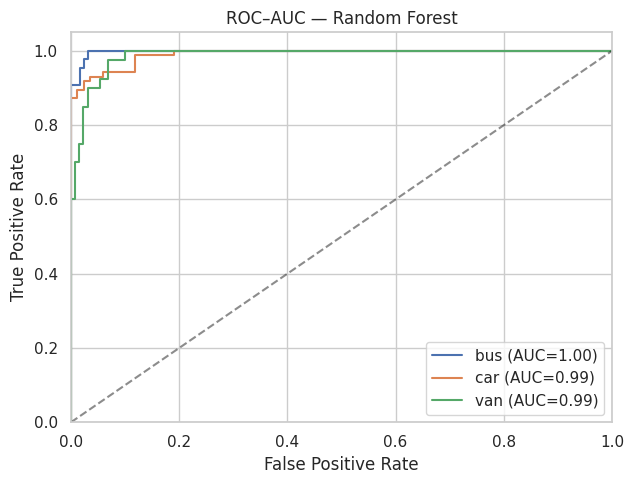


🔎 Tuning: XGBoost
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.15, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 400, 'reg_alpha': 0.0, 'reg_lambda': 1.0, 'subsample': 1.0} | Best CV acc: 0.9409

Classification report:
              precision    recall  f1-score   support

         bus       0.96      1.00      0.98        44
         car       0.96      0.94      0.95        86
         van       0.93      0.93      0.93        40

    accuracy                           0.95       170
   macro avg       0.95      0.96      0.95       170
weighted avg       0.95      0.95      0.95       170



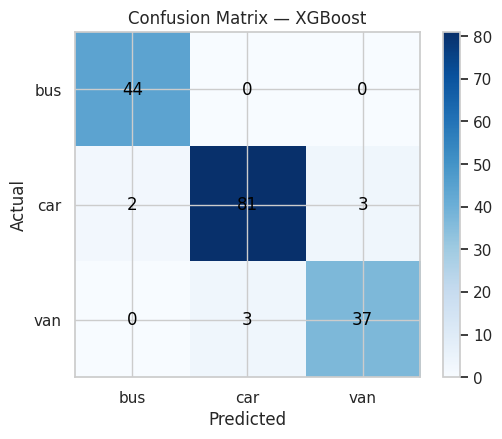

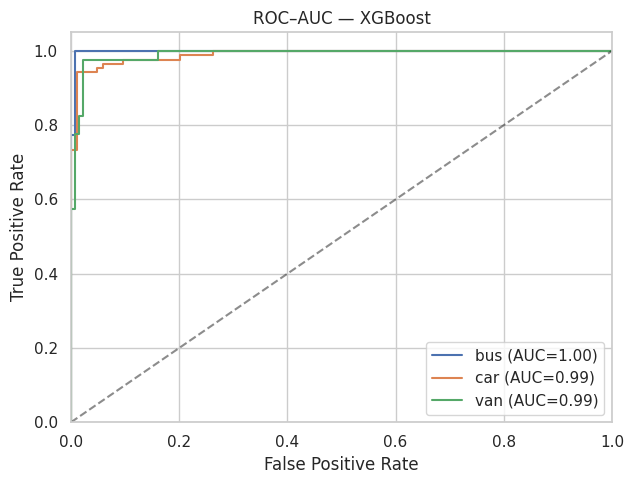


📊 Tuned Model Comparison
              Model  Accuracy  Precision   Recall       F1
            XGBoost  0.952941   0.948602 0.955620 0.951906
                SVC  0.941176   0.926768 0.952326 0.937501
      Random Forest  0.929412   0.921570 0.927502 0.924102
                KNN  0.900000   0.893238 0.903665 0.898157
Logistic Regression  0.894118   0.877381 0.893904 0.884529
      Decision Tree  0.841176   0.837651 0.814447 0.823400


In [ ]:
# === imports ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc
)
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# ------------------------------------------------------------------
def plot_cm_and_roc(name, y_true_int, y_pred_int, score_matrix, class_names):
    """score_matrix: probabilities (n_samples x n_classes) or decision_function outputs."""
    # Confusion matrix
    cm = confusion_matrix(y_true_int, y_pred_int)
    fig, ax = plt.subplots(1, 1, figsize=(5.5, 4.5))
    im = ax.imshow(cm, cmap="Blues")
    ax.figure.colorbar(im, ax=ax)
    ax.set_xticks(range(len(class_names))); ax.set_xticklabels(class_names)
    ax.set_yticks(range(len(class_names))); ax.set_yticklabels(class_names)
    ax.set_xlabel("Predicted"); ax.set_ylabel("Actual")
    ax.set_title(f"Confusion Matrix — {name}")
    # annotate
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha="center", va="center", color="black")
    plt.tight_layout()
    plt.show()

    # ROC per class (One-vs-Rest)
    y_true_bin = label_binarize(y_true_int, classes=np.arange(len(class_names)))
    if score_matrix is None:
        print(f"(No scores for ROC–AUC for {name})")
        return

    plt.figure(figsize=(6.5, 5.0))
    for i, cls in enumerate(class_names):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], score_matrix[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{cls} (AUC={roc_auc:.2f})")
    plt.plot([0,1], [0,1], "k--", alpha=0.5)
    plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.title(f"ROC–AUC — {name}")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------------
# 1) Define grids
# ------------------------------------------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grids = {
    "Logistic Regression": {
        "est": LogisticRegression(max_iter=500, multi_class="ovr", n_jobs=-1),
        "param": {
            "C": [0.1, 1, 5, 10],
            "penalty": ["l2"],
            "solver": ["lbfgs"],  # 'liblinear' also ok for small sets
        },
    },
    "KNN": {
        "est": KNeighborsClassifier(),
        "param": {
            "n_neighbors": [3, 5, 7, 9, 15],
            "weights": ["uniform", "distance"],
            "p": [1, 2],  # Manhattan vs Euclidean
        },
    },
    "SVC": {
        "est": SVC(probability=True, class_weight="balanced", random_state=42),
        "param": {
            "C": [0.8, 1.0, 1.5, 2.0, 3.0],
            "kernel": ["rbf"],
            "gamma": ["scale", 0.10, 0.05, 0.02],
        },
    },
    "Decision Tree": {
        "est": DecisionTreeClassifier(random_state=42),
        "param": {
            "max_depth": [None, 5, 10, 20],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 5],
        },
    },
    "Random Forest": {
        "est": RandomForestClassifier(random_state=42, n_jobs=-1),
        "param": {
            "n_estimators": [200, 400],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5],
            "min_samples_leaf": [1, 2],
            "max_features": ["sqrt", "log2"],
        },
    },

    "XGBoost" : {
        "est": XGBClassifier(
            objective="multi:softprob",
            num_class=n_classes,
            eval_metric="mlogloss",
            tree_method="hist",
            random_state=42,
            n_jobs=-1
        ),
        "param": {
            # keep lr moderately small; let depth/trees do the lifting
            "learning_rate": [0.07, 0.10, 0.15],
            # center near your good result (depth≈7)
            "max_depth": [5, 6, 7],
            # trees count around your best; no very small/huge jumps
            "n_estimators": [200, 300, 400],
            # slightly less aggressive subsampling (0.9 often safer than 0.8)
            "subsample": [0.9, 1.0],
            "colsample_bytree": [0.9, 1.0],
            # light regularization knobs to prevent overfitting
            "min_child_weight": [1, 3],
            "reg_lambda": [1.0, 1.5],
            "reg_alpha": [0.0, 0.1],
        },
    }
 }
# ------------------------------------------------------------------
# 2) Run GridSearchCV and evaluate
# ------------------------------------------------------------------
rows = []
best_models = {}

for name, cfg in grids.items():
    print(f"\n🔎 Tuning: {name}")
    g = GridSearchCV(
        estimator=cfg["est"],
        param_grid=cfg["param"],
        scoring="f1_macro",        # was "accuracy"
        refit="f1_macro",          # refit the best by macro-F1
        cv=cv,
        n_jobs=-1,
        verbose=1
    )
    g.fit(X_train, y_train_enc)
    print("Best params:", g.best_params_, "| Best CV acc:", round(g.best_score_, 4))

    best = g.best_estimator_
    best_models[name] = best

    # predict
    y_pred = best.predict(X_test)

    # decision scores for ROC (probabilities preferred)
    if hasattr(best, "predict_proba"):
        scores = best.predict_proba(X_test)
    elif hasattr(best, "decision_function"):
        raw = best.decision_function(X_test)
        # ensure shape (n_samples, n_classes)
        scores = raw if raw.ndim == 2 else np.column_stack([-raw, raw])
    else:
        scores = None

    # metrics (macro averages treat all classes equally)
    acc  = accuracy_score(y_test_enc, y_pred)
    pre  = precision_score(y_test_enc, y_pred, average="macro", zero_division=0)
    rec  = recall_score(y_test_enc, y_pred, average="macro", zero_division=0)
    f1   = f1_score(y_test_enc, y_pred, average="macro", zero_division=0)

    print("\nClassification report:")
    print(classification_report(y_test_enc, y_pred, target_names=class_names, zero_division=0))

    rows.append({"Model": name, "Accuracy": acc, "Precision": pre, "Recall": rec, "F1": f1})

    # plots
    plot_cm_and_roc(name, y_test_enc, y_pred, scores, class_names)

# Summary table
summary = pd.DataFrame(rows).sort_values("Accuracy", ascending=False).reset_index(drop=True)
print("\n📊 Tuned Model Comparison")
print(summary.to_string(index=False))

## **Evaluation of the tuned results**


⸻

**🔎 Key Insights**

	1.	XGBoost is the clear winner

	•	Highest accuracy (95.3%) and F1 (95.2%)
	•	Balanced performance across bus, car, van classes
	•	ROC-AUC close to 1.0 for all classes (excellent separation)

	2.	SVC is a strong competitor

	•	Accuracy (94.1%) and F1 (93.7%) only slightly behind XGBoost
	•	Very strong ROC-AUC (≈0.99–1.0), particularly for bus
	•	Might be computationally more expensive on larger datasets compared to XGBoost

	3.	Random Forest is reliable

	•	Accuracy (92.9%) with stable precision/recall
	•	Performs well but slightly worse than XGBoost and SVC
	•	Good choice if interpretability (via feature importance) matters

	4.	KNN & Logistic Regression are decent baselines

	•	KNN: 90% accuracy but lower robustness, can struggle with scalability
	•	Logistic Regression: 89.4% accuracy, surprisingly solid for a linear model, but underperforms on complex decision boundaries

	5.	Decision Tree performs the worst

	•	Accuracy (84.1%) and F1 (82.3%)
	•	Likely overfitting/underfitting despite tuning

⸻

**✅ Recommendations**

	•	Primary Model: Use XGBoost — best trade-off between accuracy, robustness, and interpretability (via SHAP/feature importance).
	•	Alternative Model: If computational efficiency is critical or dataset grows, Random Forest is a simpler and still strong choice.
	•	For interpretability: Logistic Regression (though less accurate) can provide clearer coefficients.
	•	SVC is excellent for small-to-medium datasets but can become very slow for large-scale problems.

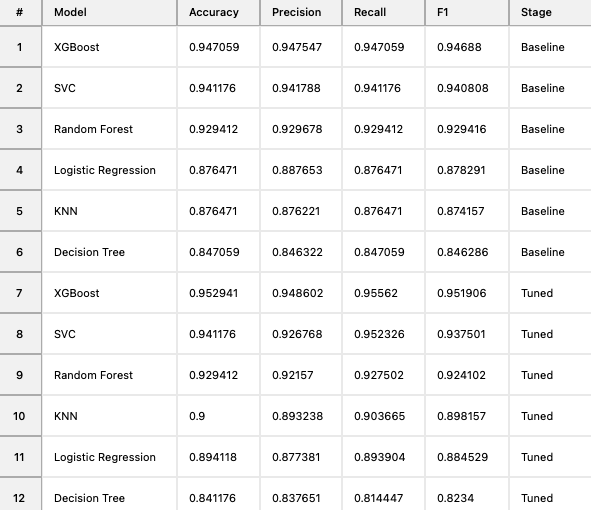

# **Conclusion**

**📌 Summary**

	•	XGBoost consistently outperformed all models both before and after tuning, achieving the highest accuracy (95.3%) and F1-score (0.95).
	•	SVC remained the second-best, showing stable performance with high recall (0.95 after tuning).
	•	Random Forest was strong but slightly behind XGBoost and SVC, stabilizing at ~93% accuracy.
	•	KNN improved notably after tuning (from 87.6% → 90% accuracy).
	•	Logistic Regression improved modestly after tuning but remains weaker compared to tree-based models and SVC.
	•	Decision Tree was the weakest model overall, and tuning did not significantly improve its performance.

**👉 Final recommendation:**

 XGBoost should be the primary model choice, with SVC as a reliable backup when interpretability or simpler deployment is preferred.

**Link for Unsupervised ML Model for the same dataset**

https://colab.research.google.com/drive/17vYy-QXGBPa6BSiyLzoObHUWpjNLwVf3#scrollTo=CmpnvTzbq-lP